In [ ]:
# importing the packages that will be used in this code
import numpy as np                   # for the operations with matrices and vectors
import matplotlib.pyplot as plt      # for visualizations
#from scipy.stats import levy_stable  # for generating samples from S_{\alpha}(1,0,0)

The following dictionary of functions is used for building the vector $\mathbf{T}$ for the method of projections. 

First, an array of equidistant numbers is generated, and then then the vectorized function from that dictionary is applied element-wise to that vector. The choice of this function affects the quality of the estimation.

In [ ]:
portfolio_of_functions = {}
portfolio_of_functions.update({'sin(x)       ': np.vectorize(lambda x: np.sin(x))})
portfolio_of_functions.update({'x            ': np.vectorize(lambda x: x)})
portfolio_of_functions.update({'x**2         ': np.vectorize(lambda x: x*x)})
portfolio_of_functions.update({'x**3         ': np.vectorize(lambda x: x*x*x)})
portfolio_of_functions.update({'x**4         ': np.vectorize(lambda x: x*x*x*x)})
portfolio_of_functions.update({'x**5         ': np.vectorize(lambda x: x**5)})
portfolio_of_functions.update({'min(x**2,x)  ': np.vectorize(lambda x: min(x*x,x))})
portfolio_of_functions.update({'min(x**3,x)  ': np.vectorize(lambda x: min(x*x*x,x))})
portfolio_of_functions.update({'min(x^3,x^5) ': np.vectorize(lambda x: min(x**3,x**5))})
portfolio_of_functions.update({'sqrt(x)      ': np.vectorize(lambda x: min(x*x,x))})
portfolio_of_functions.update({'cos(x)       ': np.vectorize(lambda x: np.cos(x)*(x != 0)  )})
portfolio_of_functions.update({'x*exp(-x)    ': np.vectorize(lambda x: (x>1)*x**2+x*np.exp(-x))})
portfolio_of_functions.update({'x**4*exp(-x) ': np.vectorize(lambda x: (x>1)*x**4+x*np.exp(-x))})

In [ ]:
KEY = list(portfolio_of_functions.keys())
fun = KEY[8]

Description of the functions from the following cell:

-  **A(a, T)** is used to generate the matrix $A(\alpha) = \{\exp(-|t_i+t_j|^{\alpha}) + \exp(-|t_i-t_j|^{\alpha}),\quad i,j=0,1,..,k\}$
-  **b(a, T)** is used to generate the vector $b(\alpha)=\{0\}\cup \{  -|t_j|^{\alpha}\ln(|t_j|)\exp(-|t_j|^{\alpha}),\quad j=1,2,..,k \}$. The usage of these functions enables us to formulate the following equation 
$$\sum_{v=1}^k \color{red}{a_v} \color{black}\cdot (\exp\left\{ -|t_v-t_j|^a \right\}+\exp\left\{ -|t_v+t_j|^a \right\})=-|t_j|^a \ln |t_j|\exp\left( -|t_j|^a\right)$$
for $j=1,2,...,k$, which is solved in terms of $a_v$, i.e. if $a(\alpha)=\{a_v,\quad v=1,2,...,k \}$, then $$a(\alpha)={\left( A(\alpha)\right)}^{-1} b(\alpha)$$
-  **F(X, T)** is used to calculate $$\sum_{j=1}^{n}F(\mathbf{T}, X_j)=\left\{2, 2\sum_{j=1}^N\cos(t_1 X_j), 2\sum_{j=1}^N\cos(t_2 X_j), ..., 2\sum_{j=1}^N\cos(t_k X_j) \right\}=2\psi_{\mathbf{X}}(\mathbf{T}).$$
The inputs of this function are as follows: $X$ is the vector of observations and $\mathbf{T}$ is the vector of the $t_j,\quad j=1,2,...,\mathrm{len}(\mathbf{T})$.
-  **projection(FX, T, a)** is used to calculate 
$$\left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} \frac{1}{n}\sum_{j=1}^{n}F(\mathbf{T}, X_j)$$
-  **fisher_info(T, a)** is used to calculate the approximation of the Fisher information of the parameter $\alpha$: if $k$ is the length of $\mathbf{T}$, then $$I_k(\alpha) = \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} \cdot b(\alpha),$$ and $$\lim_{k \longrightarrow \infty} I_k(\alpha) = I(\alpha).$$

In [ ]:
def A1(a, T):
    n = T.shape[0]
    A, B = np.meshgrid(T, T)
    matrix = np.exp(-2*abs(A + B)**a) + np.exp(-2*abs(A - B)**a)
    return matrix


def B1(a, T):  
    T = np.array(T, dtype=np.float64)
    T[T == 0] = np.finfo(np.float64).eps
    y = -2*abs(T)**a * np.log(2*abs(T)) * np.exp(-2*abs(T)**a)
    return y

def F(X, T):
    X1 = np.outer(X, T)
    Y1 = np.cos(X1)
    FX = np.mean(Y1, axis=0)
    return 2*FX

def projection1(FX, T, a):
    return abs(np.dot(np.dot(np.linalg.inv(A1(a, T)), B1(a, T)), FX))


    

def fisher_info1(T, a):
    return abs(np.dot(np.dot(np.linalg.inv(A1(a, T)), B1(a, T)), B1(a, T)))

In [ ]:
def A(a, T):
    n = T.shape[0]
    A, B = np.meshgrid(T, T)
    matrix = np.exp(-2*abs(A + B)**a) + np.exp(-2*abs(A - B)**a)
    return matrix

def A_F2(a, T):
    n = T.shape[0]
    A, B = np.meshgrid(T, T)
    matrix = np.exp(-abs(A + B)**a)
    return matrix

def A_F(a, T):
    A, B = np.meshgrid(T, T)
    for t1 in range(len(T)):
        for t2 in range(len(T)):
            A[t1, t2] = np.exp(-abs(T[t1]+T[t2])**a)
    return A

def B(a, T):  
    T = np.array(T, dtype=np.float64)
    T[T == 0] = np.finfo(np.float64).eps
    y = -2*abs(T)**a * np.log(2*abs(T)) * np.exp(-2*abs(T)**a)
    return y

def F(X, T):
    X1 = np.outer(X, T)
    Y1 = np.cos(X1)
    FX = np.mean(Y1, axis=0)
    return 2*FX

def projection(FX, T, a):
    return abs(np.dot(np.dot(np.linalg.inv(A(a, T)), B(a, T)), FX))

def empiric_fisher(X, T, a):
    vct = np.dot(np.linalg.inv(A(a, T)), B(a, T))
    J = []
    for x in X:
        y = np.outer(x, T)
        y1 = np.cos(y)
        j0 = np.dot(vct, y1[0])
        j0 = j0**2
        J.append(j0)
    return np.mean(J)

    

def fisher_info(T, a):
    return abs(np.dot(np.dot(np.linalg.inv(A(a, T)), B(a, T)), B(a, T)))

In [ ]:
def bootstraps(X, n_samples):
    Y = X.copy()
    Z = []
    for j in range(n_samples):
        np.random.shuffle(Y)
        half_Y = int(len(Y)/2)
        Z = Z + list(Y[:half_Y] - Y[half_Y:])
    Z = np.array(Z)
    return Z

The following functions are used to explore the different values of $\alpha$ to find the optimal one. 

If the function projection(FX, T, $\alpha$) is unimodal in $\alpha$ for the fixed FX and T, then binary search can be applied. However, if this condition is violated, it may lead to wrong estimates of $\alpha$. Therefore, in the next cell, three search functions are defined: 
  

1.   **Straightforward search:** it takes an array of equidistant points and calculates **projection(FX, T, $\alpha$)** for each $\alpha$ in the array. The value that minimizes **projection(FX, T, $\alpha$)** is chosen. This function is called *straightforward_search*.
2.   **Classic binary search**. This function is called *binary_search_min_of_function_aux*.
3.   **Extended binary search**: It applies classic binary search on subintervals and chooses the value of α that minimizes  **projection(FX, T, $\alpha$)**. This function is called *extended_binary_search*.

The last function *truncate_string* is auxiliary and used to print statements.


In [ ]:
def binary_search_min_of_function_aux(fun, start, end):
    left, right = start, end
    epsilon = 1e-10  # tolerance for the precision of the minimum
    while (right - left) > epsilon:
        mid = (left + right) / 2
        if fun(mid) <= fun(mid + epsilon):
            right = mid
        else:
            left = mid
    return left, fun(mid)

def extended_binary_search(fun, start, end):
    LIST = []
    arr = np.linspace(start, end, 10)
    for i in range(len(arr)):
        if i < len(arr) - 1:
          alph, J = binary_search_min_of_function_aux(fun, arr[i], arr[i+1])
          LIST.append([alph, J])
        else:
          if arr[i] < 2:
            alph, J = binary_search_min_of_function_aux(fun, arr[i], 2)
            LIST.append([alph, J])            
    min_second = min(item[1] for item in LIST)
    INDEX = [item[1] for item in LIST].index(min_second)
    output = LIST[INDEX][0]
    return output

def straightforward_search(fun, start, end):
    Alpha = list(np.arange(start_alpha, end_alpha, 0.01))+[]
    crit = []
    for al in Alpha:
        y = fun(al)
        crit.append(y)
    argmin = np.argmin(crit)
    return Alpha[argmin]

def truncate_string(num):
    num = round(num, 4)
    num = str(num)
    new_string = num[:6]
    return new_string + "0" * (6 - len(new_string))

# **Generating samples from Stable distributions**

A sample from $S_{\alpha}(1,\beta,0)$ can be generated using the following formula

$$X = S_{\alpha, \beta}\cdot \frac{\sin(\alpha(V+B_{\alpha, \beta}))}{\cos(V)^{\alpha}} {\left(  \frac{ \cos(V-\alpha (V+B_{\alpha, \beta})) }{W} \right)}^{ \frac{1-\alpha}{\alpha} },$$


where $W\sim \exp(1)$, $V\sim U\left(-\frac{\pi}{2}, \frac{\pi}{2} \right)$, $V$ and $W$ are independent, and
\begin{align*}
B_{\alpha, \beta}&=\frac{\mathrm{arctan} \left( \beta \tan \frac{\pi \alpha}{2}\right) }{\alpha} \\
S_{\alpha, \beta}&={\left( 1 + {\left( \beta \tan\left( \frac{\pi \alpha}{2} \right) \right)}^2 \right)}^{\frac{1}{2\alpha}}
\end{align*} 

In [ ]:
#Generation of samples from stable distribution

def beta(a, b):
    return np.arctan(b*np.tan(np.pi*a/2))/a

def svalue(alpha, bett):
    val_beta = bett*bett
    val_tan  = np.tan(np.pi*alpha/2)*np.tan(np.pi*alpha/2)
    power_val = 1/(2*alpha)
    return (1+val_beta*val_tan)**power_val

def stable_sample(alpha, N):
    bt = 0
    sample_exp = np.random.exponential(scale=1, size=N)
    sample_uni = np.random.uniform(low=-np.pi/2, high=np.pi/2, size=N)
    Y1 = svalue(alpha, bt)*np.sin(alpha*(sample_uni + beta(alpha, bt)))
    Y2 = np.cos(sample_uni)
    Y2 = Y2**(-1/alpha)
    Y3 = np.cos(sample_uni - alpha*(sample_uni + beta(alpha, bt)))
    Y3 = Y3**((1-alpha)/alpha)
    Y4 = sample_exp**((alpha-1)/alpha)
    Y = Y1*Y2
    Y *= Y3
    Y *= Y4
    return Y*2**(1/alpha)

The following function demonstrates the estimation of $\alpha$ with the methodology of projections. A user defines a list of the value of $\alpha$ and this function provides estimates of those values of the tail index.


The number of those estimates is determined by the ***input N_samples***. These estimates are aggregated, and the average $\mu$ of those estimates and the $\mu \pm 3\sigma$ intervals are visualized. 

If all the estimates of $\alpha$ from that picture lie on the line $y(x) = x$, the estimate is considered perfect. The deviations from this line measure the error of the estimates. In the output plot, the true values of $\alpha$ are represented on the line $y(x)=x$.


In [ ]:
def calculate_estimates_and_visualize(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, N_f, verbose, n_samples):
    # Description of the input variables
    # N                       ... sample size
    # gran                    ... the number of alpha values that are estimated and tested
    # N_samples               ... the number of samples for each value of alpha
    # start_alpha             ... the first (smallest) alpha (but bigger than 0.1)
    # end_alpha               ... the last  (biggest)  alpha (but not larger than 2)
    # portfolio_of_functions  ... the set functions each of which can be used to build T
    # N_f                     ... the index of the function in portfolio_of_function that will be applied
    # verbose                 ... if it is one, it will print intermediary results and visualize the final output

    KEY = list(portfolio_of_functions.keys())
    Means = []
    STDs = []

    Means1 = []
    STDs1 = []

    values_of_alpha = np.linspace(start_alpha, end_alpha, gran)
    Fishr_invers = []
    Fishr_invers1 = []
    for xa in values_of_alpha:
        # Forming the array of the estimates of xa
        estimates = []
        estimates1 = []
        for i in range(N_samples):
            fun = KEY[N_f]
            # Generation of a sample from S_{\alpha}(1, 0, 0) with sample size N
            X = stable_sample(xa, N)
            X1 = bootstraps(X, n_samples)
            X1 = X1/2**(1/xa)
            # Production of the vector T for functions A(a, T), b(a, T), etc.
               # Production of the initial interval with equidistant points
            T = np.arange(0, 3, 0.05)
            # The application of the function of choice on T
            T = portfolio_of_functions[fun](T)
            # Making sure that at least one element is close to unit in array T
            if max(T) < 0.999:
               T[-1] = 0.999
            FX = F(X, T)
            FX1 = F(X1, T)
            fun0 = lambda x: projection(FX, T, x)
            fun01 = lambda x: projection(FX1, T, x)
            alpha_est = extended_binary_search(fun0, start_alpha, end_alpha)
            alpha_est1 = extended_binary_search(fun01, start_alpha, end_alpha)
            # Additing the estimate to the array
            estimates.append(alpha_est)
            estimates1.append(alpha_est1)
        # if you prefer to see the intermediate results you can choose verbose to be equal to 1.    
        if verbose:
          print('alpha = '+truncate_string(xa)+', est0 = '+truncate_string(np.mean(estimates))+', std0 = '+truncate_string(np.std(estimates)))
          print('alpha = '+truncate_string(xa)+', est1 = '+truncate_string(np.mean(estimates1))+', std1 = '+truncate_string(np.std(estimates1)))
          print('---------------------------------------------------------------')
        # The forming of the arrays of the means and STDs of the estimates
        Means.append(np.mean(estimates))
        STDs.append(np.std(estimates))
        Fishr_invers.append(np.sqrt(0.5/fisher_info(T, xa)))

        Means1.append(np.mean(estimates1))
        STDs1.append(np.std(estimates1))
        Fishr_invers1.append(np.sqrt(0.5/fisher_info1(T, xa)))

    # The calculation of the average and maximum bias of the estimates
    Bias_avg = np.mean((np.array(Means) - np.array(values_of_alpha))**2)
    Bias_max = max((np.array(Means) - np.array(values_of_alpha))**2)
    # The calculation of the average and maximum std of the estimates
    Std_avg = np.mean(STDs)
    Std_max = max(STDs)
    if N < 200:
      print('---------------------------------------------------------------')
      print('N = '+str(N)+'.   For fun(x) = '+fun+' avg_max_bias = '+truncate_string(Bias_avg)+    ', min_max_bias = '+truncate_string(Bias_max))
      print('N = '+str(N)+'.   For fun(x) = '+fun+' avg_max_std  = '+truncate_string(Std_avg)+', min_max_std  = '+truncate_string(Std_max))
    else:
      print('---------------------------------------------------------------')
      print('N = '+str(N)+'. For fun(x) = '+fun+' avg_max_bias = '+truncate_string(Bias_avg)+    ', min_max_bias = '+truncate_string(Bias_max))
      print('N = '+str(N)+'. For fun(x) = '+fun+' avg_max_std  = '+truncate_string(Std_avg)+', min_max_std  = '+truncate_string(Std_max))
    # The calculation of mu plus/minus 3sigma
    upper_line = np.array(Means) + 3*np.array(STDs)
    lower_line = np.array(Means) - 3*np.array(STDs)
    # Visualization
    if verbose:
        fig, ax = plt.subplots(figsize=(18, 10), ncols=2)

        ax[0].plot(values_of_alpha, Means, 'g-o')
        ax[0].plot(values_of_alpha, Means1, 'c-o')
        ax[0].plot(values_of_alpha, upper_line, 'b')
        ax[0].plot(values_of_alpha, lower_line, 'r')
        ax[0].plot(values_of_alpha, values_of_alpha, 'k')
        ax[0].fill_between(values_of_alpha, upper_line, lower_line, color='gray', alpha=0.5)
        ax[0].grid()
        ax[0].set_xlabel(r'$\alpha$')
        ax[0].set_ylabel(r'estimate $\alpha$')
        ax[0].set_title(r'Average estimates and their $\mu \pm 3 \sigma$ intervals. N = ' + str(N))
        ax[0].legend(['$\mu$,  $\mu = avg(alpha\_sample)$','$ \mu + 3*\sigma$,  $\sigma = std(alpha\_sample)$', '$\mu - 3*\sigma$',  'real_alpha'])

        # Your original code for the right subplot
        ax[1].plot(values_of_alpha, np.array(STDs)*np.sqrt(N), 'g-o')
        ax[1].plot(values_of_alpha, np.array(STDs1)*np.sqrt(N), 'c-o')
        ax[1].plot(values_of_alpha, Fishr_invers)
        ax[1].set_xlabel(r'$\alpha$')
        ax[1].set_ylabel(r'$1/\sqrt{FisherInfo(\alpha)}$')
        ax[1].grid()
        ax[1].legend([r'$\sqrt{N}$*STD','Inverse_fisher_info'])
        ax[1].set_title(r'STD*$\sqrt{N}$, N = '+str(N))

        # Adjust the spacing between the subplots
        plt.subplots_adjust(wspace=0.3)
    return Means, STDs, Bias_max, Std_max, Means1, STDs1, Means1, STDs1

Let us recall that
$$J_k(\mathbf{X}, \mathbf{T}, \alpha) =  \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} \frac{1}{n}\sum_{m=1}^{n}F(\mathbf{T}, X_m),$$

and let us fix the vector of observations $\mathbf{X}$ and the vector $\mathbf{T}$ and define 
$$\mathrm{Error}(\alpha) = \left|J_k(\mathbf{X}, \mathbf{T}, \alpha)\right|.$$

Hence, $\hat{\alpha}_{_{MLP}}=\mathrm{argmin}_{a} \mathrm{Error}(a)$ is the MLP estimate of $\alpha$.

In the following cells, the function $\mathrm{Error}(a)$ will be visualized for various $X$ and various true values of $\alpha$. 

For some inputs, $\mathrm{Error}(a)$ is unimodal in $a$ and binary search can be applied. For other choices, the function is not unimodal and binary search can result in incorrect estimates. This issue is addressed by the extended binary search.

alpha = 1.4, alpha_straightforward_search = 1.4, alpha_extended_bin_search = 1.403
-------------------------------------------------------------------


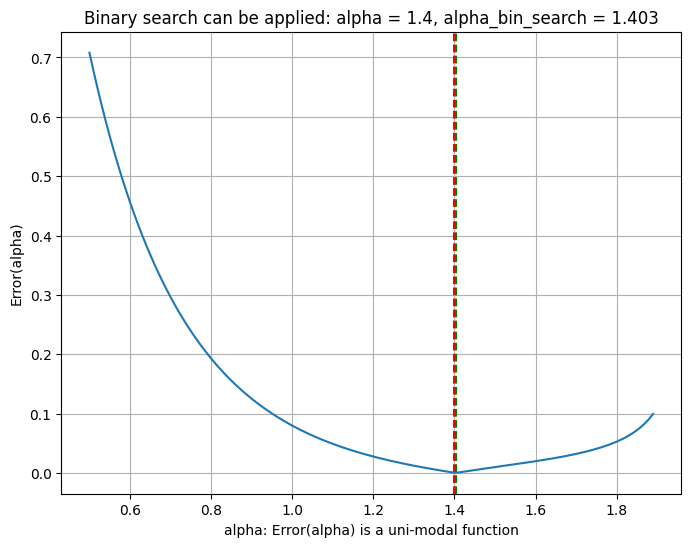

In [ ]:
# The following function looks unimodal and binary search can be applied
test_alpha = 1.4
N = 80000
start_alpha = 0.5 
end_alpha = 1.9
gran_of_choice = 0.01

# Simulation of a sample
X = stable_sample(test_alpha, N)
estimates = []
T = np.arange(0, 0.5, 0.07)
T = portfolio_of_functions[fun](T)
if max(T)<0.999:
  T[-1] = 0.999
Alpha = list(np.arange(start_alpha, end_alpha, gran_of_choice))+[]
FX = F(X, T)
crit = []
for al in Alpha:
    y = projection(FX, T, al)
    crit.append(y)

fun0 = lambda x: projection(FX, T, x)

argmin = np.argmin(crit) 
alpha_bin_search = extended_binary_search(fun0, start_alpha, end_alpha)
alpha_straighforward = Alpha[argmin]
print('alpha = '+str(round(test_alpha, 4))+', alpha_straightforward_search = '+str(round(alpha_straighforward, 4))+', alpha_extended_bin_search = '+str(round(alpha_bin_search, 4)))
print('-------------------------------------------------------------------')

fig = plt.figure(figsize=(8, 6))
plt.plot(Alpha, crit)
plt.grid()
plt.xlabel('alpha: Error(alpha) is a uni-modal function')
plt.ylabel('Error(alpha)')
plt.title('Binary search can be applied: alpha = '+str(test_alpha)+', alpha_bin_search = '+str(round(alpha_bin_search,4)))
plt.axvline(x=test_alpha, color='red', linestyle='--')
plt.axvline(x=alpha_bin_search, color='green', linestyle='--')
plt.show()

alpha = 0.1, alpha_straightforward_search = 0.12, alpha_classical_bin_search = 0.1183
-------------------------------------------------------------------


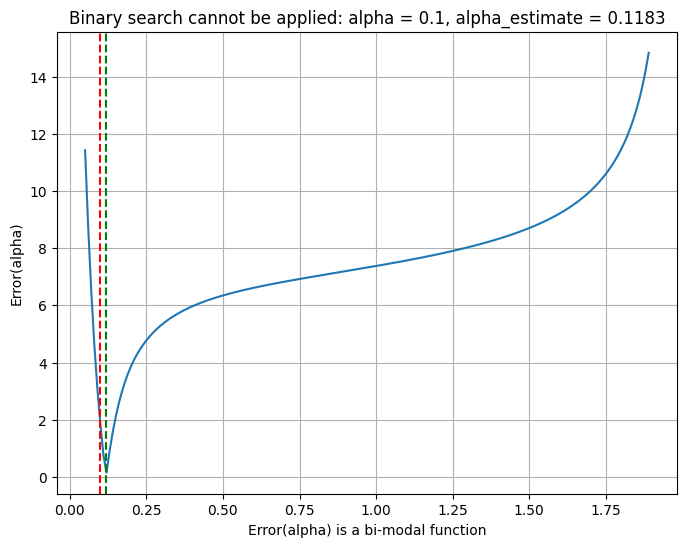

In [ ]:
# A non unimodal case
test_alpha = 0.1
N = 8000
start_alpha = 0.05 
end_alpha = 1.9
gran_of_choice = 0.01


X = stable_sample(test_alpha, N)
estimates = []
T = np.arange(0, 10, 0.07)
T = portfolio_of_functions[fun](T)
if max(T)<0.999:
  T[-1] = 0.999
Alpha = list(np.arange(start_alpha, end_alpha, gran_of_choice))+[]
FX = F(X, T)
crit = []
for al in Alpha:
    y = projection(FX, T, al)
    crit.append(y)

fun0 = lambda x: projection(FX, T, x)
argmin = np.argmin(crit) 
alpha_classical_binary_search, J_classical_binary_search = binary_search_min_of_function_aux(fun0, start_alpha, end_alpha)
alpha_straightforward_search = Alpha[argmin]

print('alpha = '+str(round(test_alpha, 4))+', alpha_straightforward_search = '+str(round(alpha_straightforward_search, 4))+', alpha_classical_bin_search = '+str(round(alpha_classical_binary_search, 4)))
print('-------------------------------------------------------------------')
 
fig = plt.figure(figsize=(8, 6))
plt.plot(Alpha, crit)
plt.grid()
plt.xlabel('Error(alpha) is a bi-modal function')
plt.ylabel('Error(alpha)')
plt.title('Binary search cannot be applied: alpha = '+str(test_alpha)+', alpha_estimate = '+str(round(alpha_classical_binary_search,4)))
plt.axvline(x=test_alpha, color='red', linestyle='--')
plt.axvline(x=alpha_classical_binary_search, color='green', linestyle='--')
plt.show()

If the classical binary search in the last plot is replaced with the extended binary search, the results will be as follows. However, this improvement in precision comes at the cost of calculation speed.

alpha = 0.1, alpha_straightforward_search = 0.12, alpha_classical_bin_search = 0.1189
-------------------------------------------------------------------


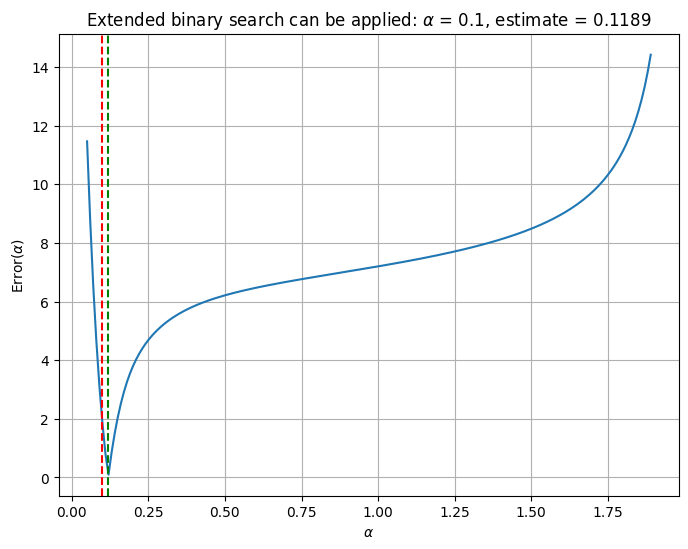

In [ ]:
# A non unimodal case
test_alpha = 0.1
N = 8000
start_alpha = 0.05 
end_alpha = 1.9
gran_of_choice = 0.01


X = stable_sample(test_alpha, N)
estimates = []
T = np.arange(0, 10, 0.07)
T = portfolio_of_functions[fun](T)
if max(T)<0.999:
  T[-1] = 0.999
Alpha = list(np.arange(start_alpha, end_alpha, gran_of_choice))+[]
FX = F(X, T)
crit = []
for al in Alpha:
    y = projection(FX, T, al)
    crit.append(y)

fun0 = lambda x: projection(FX, T, x)
argmin = np.argmin(crit) 
alpha_classical_binary_search = extended_binary_search(fun0, start_alpha, end_alpha)
alpha_straightforward_search = Alpha[argmin]

print('alpha = '+str(round(test_alpha, 4))+', alpha_straightforward_search = '+str(round(alpha_straightforward_search, 4))+', alpha_classical_bin_search = '+str(round(alpha_classical_binary_search, 4)))
print('-------------------------------------------------------------------')
 
fig = plt.figure(figsize=(8, 6))
plt.plot(Alpha, crit)
plt.grid()
plt.xlabel(r'$\alpha$')
plt.ylabel(r'Error($\alpha$)')
plt.title(r'Extended binary search can be applied: $\alpha$ = '+str(test_alpha)+', estimate = '+str(round(alpha_classical_binary_search,4)))
plt.axvline(x=test_alpha, color='red', linestyle='--')
plt.axvline(x=alpha_classical_binary_search, color='green', linestyle='--')
plt.show()

In [ ]:
gran = 10              # The choice of the granularity
N_samples = 50         # The number of samples from which the aggregate values are calculated
start_alpha = 0.15     # The start value of alpha 
end_alpha = 2          # The end value of alpha
""" with gran, start_alpha, and end_alpha, an array of alphas is produced with
    equidistant points starting with start_alpha, ending with end_alpha, and
    the array contains gran elements.
"""

' with gran, start_alpha, and end_alpha, an array of alphas is produced with\n    equidistant points starting with start_alpha, ending with end_alpha, and\n    the array contains gran elements.\n'

alpha = 0.1500, est0 = 0.1558, std0 = 0.0077
alpha = 0.1500, est1 = 0.1577, std1 = 0.0083
---------------------------------------------------------------
alpha = 0.3556, est0 = 0.3559, std0 = 0.0255
alpha = 0.3556, est1 = 0.3588, std1 = 0.0325
---------------------------------------------------------------
alpha = 0.5611, est0 = 0.5536, std0 = 0.0427
alpha = 0.5611, est1 = 0.5607, std1 = 0.0572
---------------------------------------------------------------
alpha = 0.7667, est0 = 0.7587, std0 = 0.0563
alpha = 0.7667, est1 = 0.7557, std1 = 0.0703
---------------------------------------------------------------
alpha = 0.9722, est0 = 0.9979, std0 = 0.0738
alpha = 0.9722, est1 = 1.0085, std1 = 0.1081
---------------------------------------------------------------
alpha = 1.1778, est0 = 1.1932, std0 = 0.0905
alpha = 1.1778, est1 = 1.2190, std1 = 0.1125
---------------------------------------------------------------
alpha = 1.3833, est0 = 1.3983, std0 = 0.0867
alpha = 1.3833, est1 = 1.4041, 

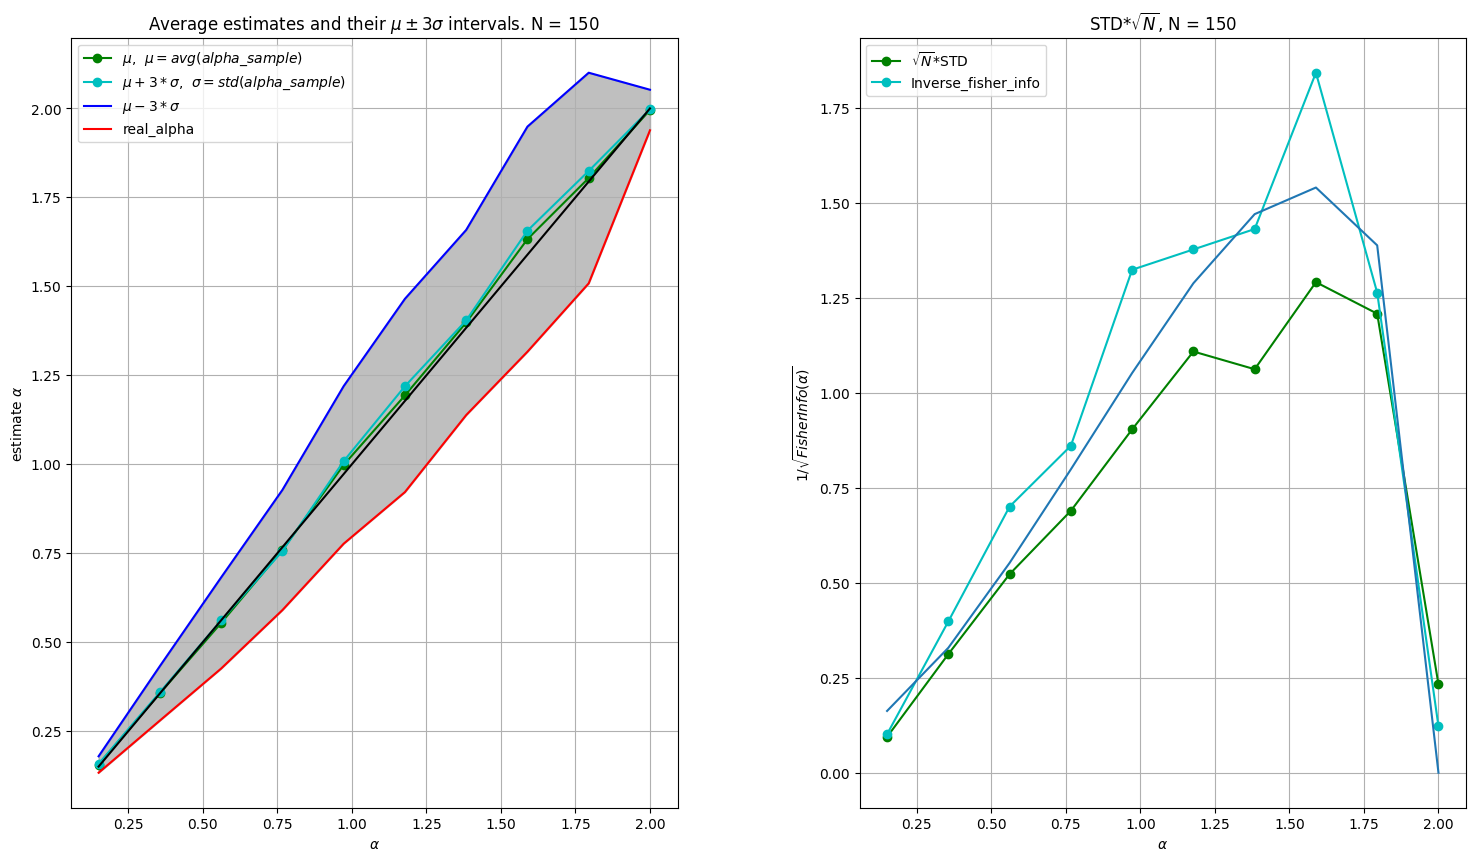

In [ ]:
#The choice of the number of observations
N = 150  # A larger sample size is chosen:
LLL = calculate_estimates_and_visualize(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 20)
     #calculate_estimates_and_visualize(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, N_f, verbose, n_samples)

alpha = 0.1500, est0 = 0.1580, std0 = 0.0084
alpha = 0.1500, est1 = 0.1592, std1 = 0.0110
---------------------------------------------------------------
alpha = 0.3556, est0 = 0.3596, std0 = 0.0239
alpha = 0.3556, est1 = 0.3560, std1 = 0.0386
---------------------------------------------------------------
alpha = 0.5611, est0 = 0.5605, std0 = 0.0395
alpha = 0.5611, est1 = 0.5604, std1 = 0.0593
---------------------------------------------------------------
alpha = 0.7667, est0 = 0.7763, std0 = 0.0575
alpha = 0.7667, est1 = 0.7807, std1 = 0.0909
---------------------------------------------------------------
alpha = 0.9722, est0 = 0.9869, std0 = 0.0708
alpha = 0.9722, est1 = 0.9939, std1 = 0.1146
---------------------------------------------------------------
alpha = 1.1778, est0 = 1.1853, std0 = 0.0780
alpha = 1.1778, est1 = 1.1791, std1 = 0.1020
---------------------------------------------------------------
alpha = 1.3833, est0 = 1.3935, std0 = 0.0939
alpha = 1.3833, est1 = 1.4123, 

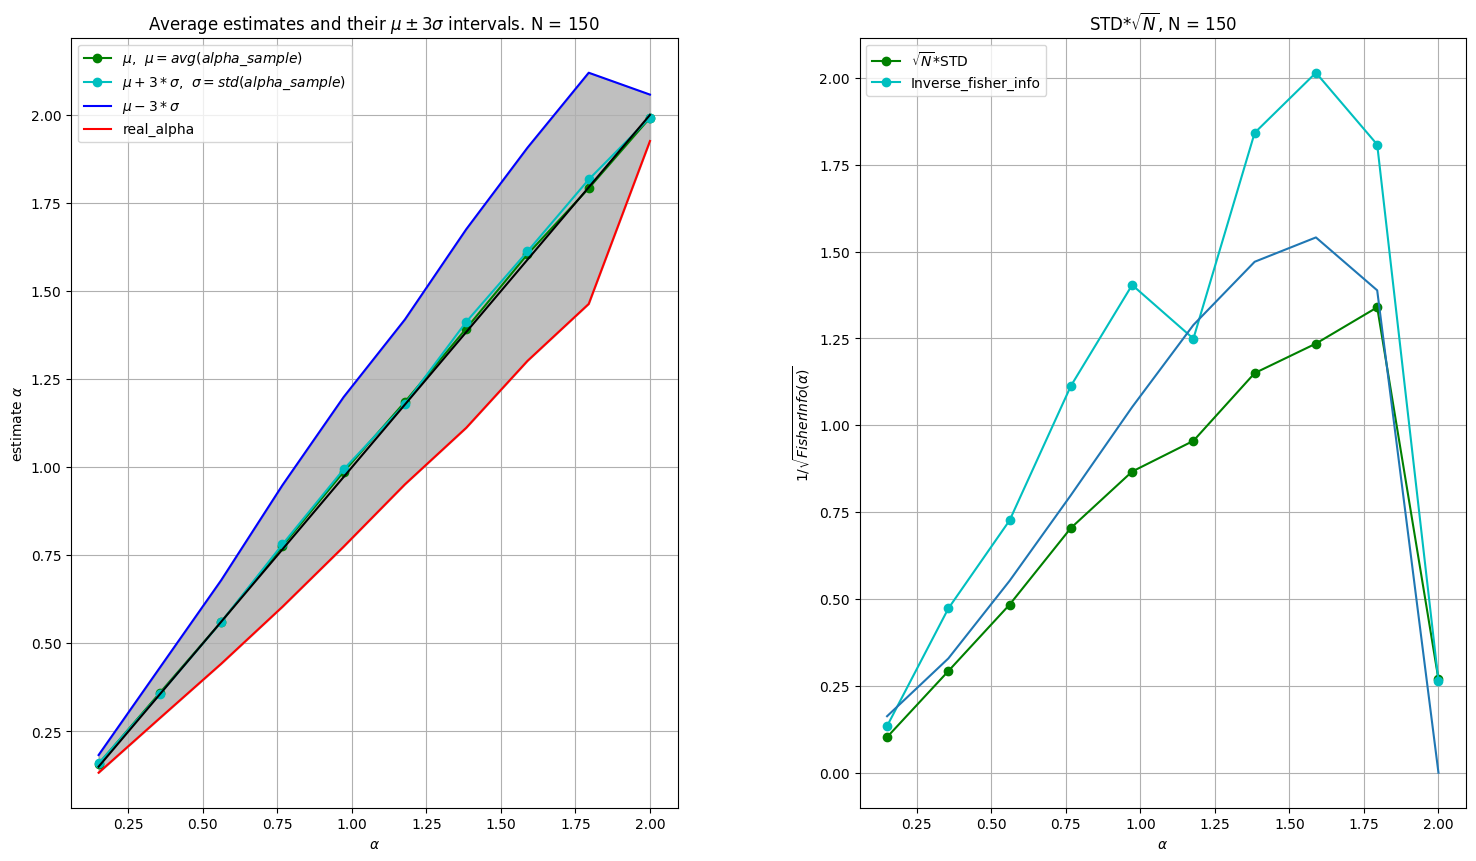

In [ ]:
#The choice of the number of observations
N = 150  # A larger sample size is chosen:
LLL = calculate_estimates_and_visualize(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 1)
     #calculate_estimates_and_visualize(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, N_f, verbose, n_samples)

alpha = 0.1500, est0 = 0.1567, std0 = 0.0038
alpha = 0.1500, est1 = 0.1571, std1 = 0.0056
---------------------------------------------------------------
alpha = 0.3556, est0 = 0.3558, std0 = 0.0105
alpha = 0.3556, est1 = 0.3559, std1 = 0.0131
---------------------------------------------------------------
alpha = 0.5611, est0 = 0.5579, std0 = 0.0160
alpha = 0.5611, est1 = 0.5536, std1 = 0.0211
---------------------------------------------------------------
alpha = 0.7667, est0 = 0.7688, std0 = 0.0288
alpha = 0.7667, est1 = 0.7675, std1 = 0.0396
---------------------------------------------------------------
alpha = 0.9722, est0 = 0.9720, std0 = 0.0275
alpha = 0.9722, est1 = 0.9733, std1 = 0.0388
---------------------------------------------------------------
alpha = 1.1778, est0 = 1.1779, std0 = 0.0366
alpha = 1.1778, est1 = 1.1744, std1 = 0.0463
---------------------------------------------------------------
alpha = 1.3833, est0 = 1.3852, std0 = 0.0449
alpha = 1.3833, est1 = 1.3874, 

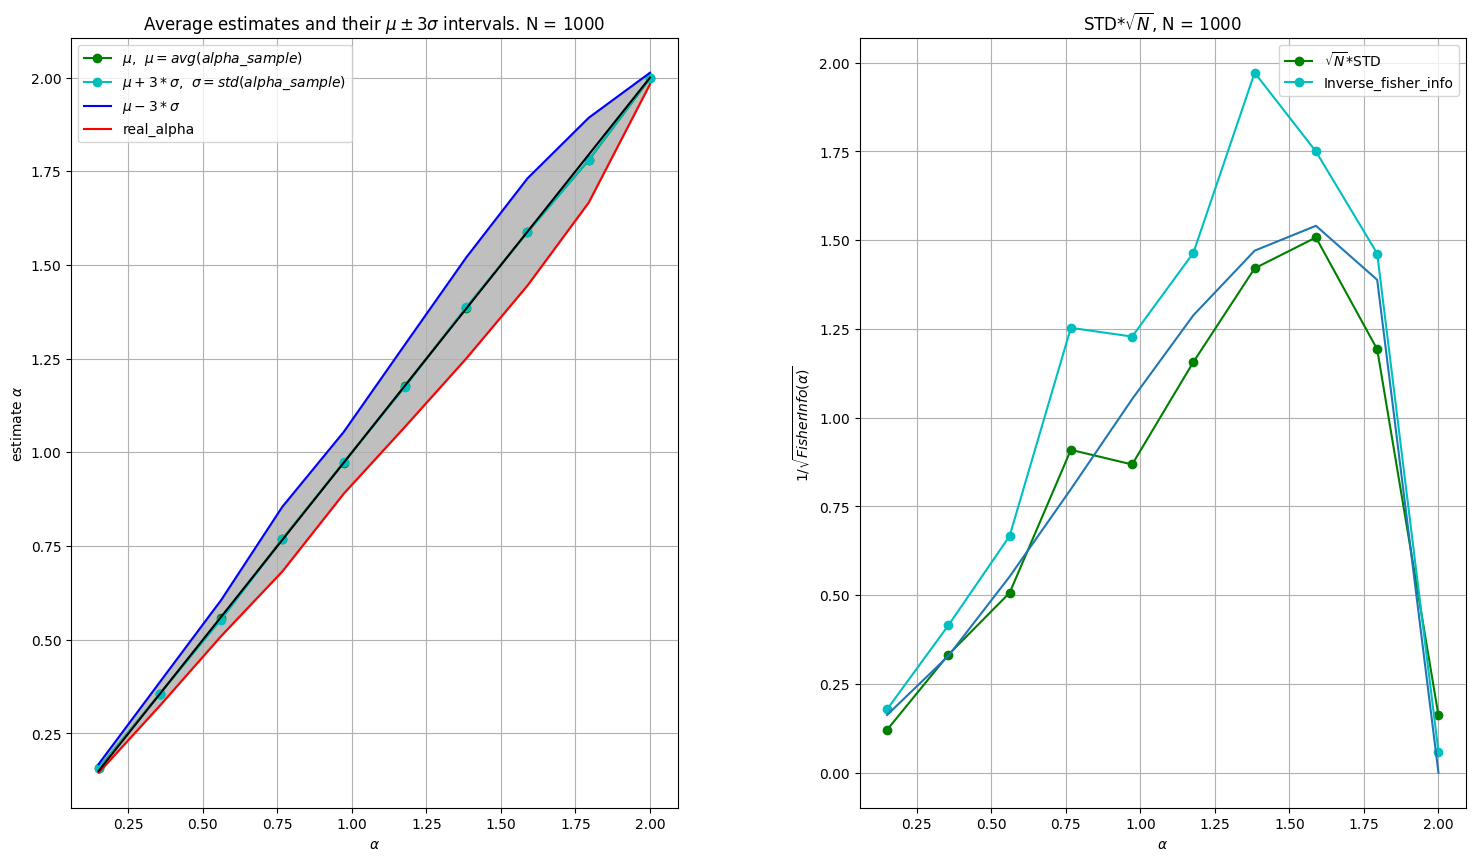

In [ ]:
#The choice of the number of observations
N = 1000  # A larger sample size is chosen:
LLL = calculate_estimates_and_visualize(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 100)
     #calculate_estimates_and_visualize(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, N_f, verbose, n_samples)

alpha = 0.1500, est0 = 0.1591, std0 = 0.0092
alpha = 0.1500, est1 = 0.1591, std1 = 0.0099
---------------------------------------------------------------
alpha = 0.3556, est0 = 0.3516, std0 = 0.0276
alpha = 0.3556, est1 = 0.3563, std1 = 0.0365
---------------------------------------------------------------
alpha = 0.5611, est0 = 0.5618, std0 = 0.0453
alpha = 0.5611, est1 = 0.5630, std1 = 0.0617
---------------------------------------------------------------
alpha = 0.7667, est0 = 0.7730, std0 = 0.0585
alpha = 0.7667, est1 = 0.7771, std1 = 0.0690
---------------------------------------------------------------
alpha = 0.9722, est0 = 0.9939, std0 = 0.0891
alpha = 0.9722, est1 = 1.0084, std1 = 0.1058
---------------------------------------------------------------
alpha = 1.1778, est0 = 1.1813, std0 = 0.0852
alpha = 1.1778, est1 = 1.1973, std1 = 0.1102
---------------------------------------------------------------
alpha = 1.3833, est0 = 1.3998, std0 = 0.1118
alpha = 1.3833, est1 = 1.4196, 

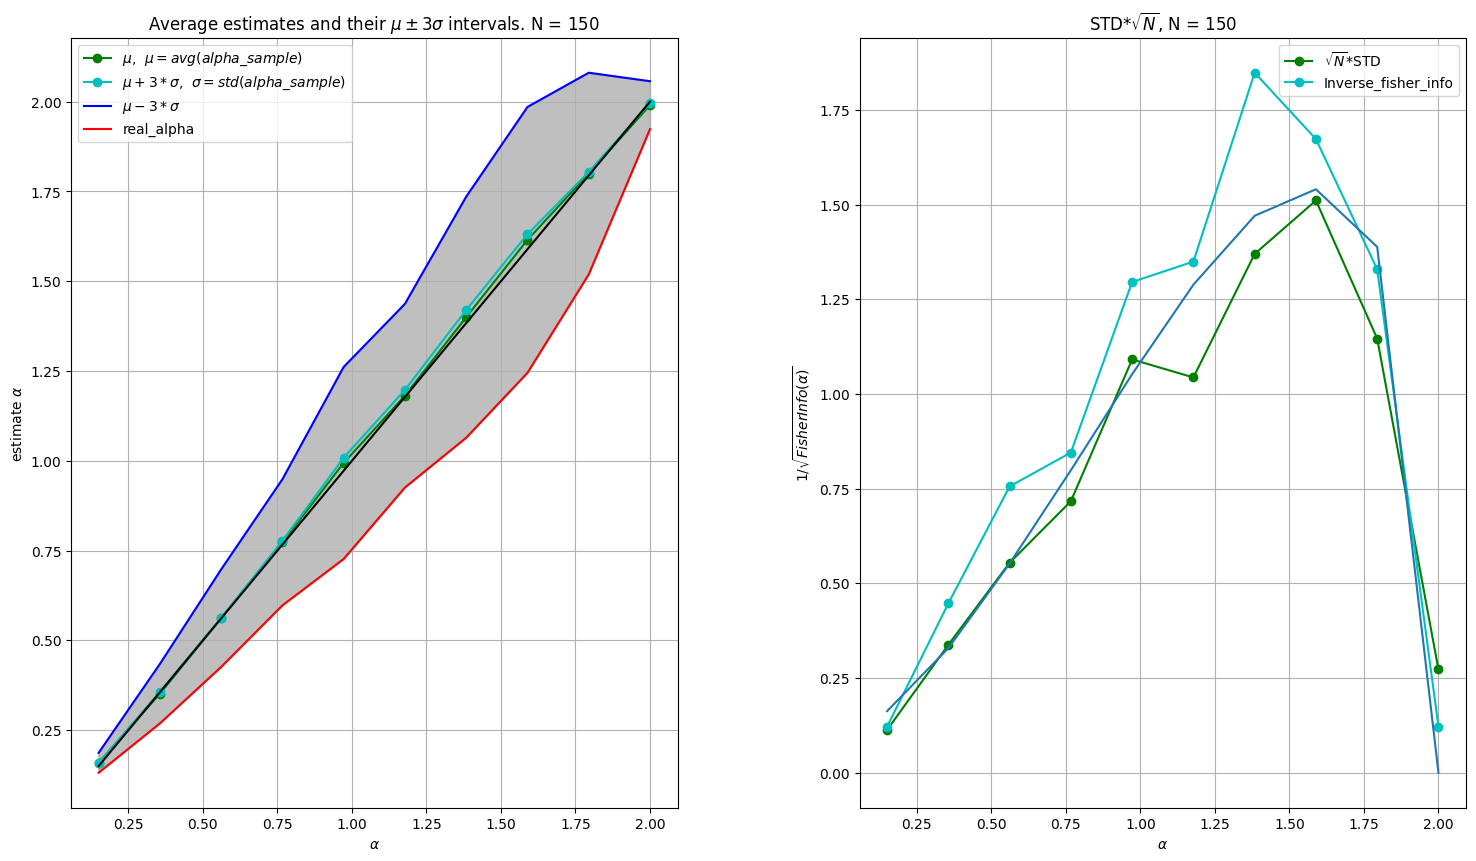

In [ ]:
#The choice of the number of observations
N = 150  # A larger sample size is chosen:
LLL = calculate_estimates_and_visualize(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 200)
     #calculate_estimates_and_visualize(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, N_f, verbose, n_samples)

In [ ]:
def calculate_estimates_and_visualize2(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, N_f, verbose, n_samples1, n_samples2):
    # Description of the input variables
    # N                       ... sample size
    # gran                    ... the number of alpha values that are estimated and tested
    # N_samples               ... the number of samples for each value of alpha
    # start_alpha             ... the first (smallest) alpha (but bigger than 0.1)
    # end_alpha               ... the last  (biggest)  alpha (but not larger than 2)
    # portfolio_of_functions  ... the set functions each of which can be used to build T
    # N_f                     ... the index of the function in portfolio_of_function that will be applied
    # verbose                 ... if it is one, it will print intermediary results and visualize the final output

    KEY = list(portfolio_of_functions.keys())
    Means = []
    STDs = []

    Means1 = []
    STDs1 = []

    Means2 = []
    STDs2 = []

    values_of_alpha = np.linspace(start_alpha, end_alpha, gran)
    Fishr_invers = []
    Fishr_invers1 = []
    for xa in values_of_alpha:
        # Forming the array of the estimates of xa
        estimates = []
        estimates1 = []
        estimates2 = []
        for i in range(N_samples):
            fun = KEY[N_f]
            # Generation of a sample from S_{\alpha}(1, 0, 0) with sample size N
            X = stable_sample(xa, N)
            X1 = bootstraps(X, n_samples1)
            X1 = X1/2**(1/xa)

            X2 = bootstraps(X, n_samples2)
            X2 = X2/2**(1/xa)
            # Production of the vector T for functions A(a, T), b(a, T), etc.
               # Production of the initial interval with equidistant points
            T = np.arange(0, 3, 0.05)
            # The application of the function of choice on T
            T = portfolio_of_functions[fun](T)
            # Making sure that at least one element is close to unit in array T
            if max(T) < 0.999:
               T[-1] = 0.999
            FX = F(X, T)
            FX1 = F(X1, T)
            FX2 = F(X2, T)
            fun0 = lambda x: projection(FX, T, x)
            fun01 = lambda x: projection(FX1, T, x)
            fun02 = lambda x: projection(FX2, T, x)
            alpha_est = extended_binary_search(fun0, start_alpha, end_alpha)
            alpha_est1 = extended_binary_search(fun01, start_alpha, end_alpha)
            alpha_est2 = extended_binary_search(fun02, start_alpha, end_alpha)
            # Additing the estimate to the array
            estimates.append(alpha_est)
            estimates1.append(alpha_est1)
            estimates2.append(alpha_est2)
        # if you prefer to see the intermediate results you can choose verbose to be equal to 1.    
        if verbose:
          print('alpha = '+truncate_string(xa)+', est0 = '+truncate_string(np.mean(estimates))+', std0 = '+truncate_string(np.std(estimates)))
          print('alpha = '+truncate_string(xa)+', est1 = '+truncate_string(np.mean(estimates1))+', std1 = '+truncate_string(np.std(estimates1)))
          print('alpha = '+truncate_string(xa)+', est2 = '+truncate_string(np.mean(estimates2))+', std2 = '+truncate_string(np.std(estimates2)))
          print('---------------------------------------------------------------')
        # The forming of the arrays of the means and STDs of the estimates
        Means.append(np.mean(estimates))
        STDs.append(np.std(estimates))
        Fishr_invers.append(np.sqrt(0.5/fisher_info(T, xa)))

        Means1.append(np.mean(estimates1))
        STDs1.append(np.std(estimates1))

        Means2.append(np.mean(estimates2))
        STDs2.append(np.std(estimates2))

        Fishr_invers1.append(np.sqrt(0.5/fisher_info1(T, xa)))

    # The calculation of the average and maximum bias of the estimates
    Bias_avg = np.mean((np.array(Means) - np.array(values_of_alpha))**2)
    Bias_max = max((np.array(Means) - np.array(values_of_alpha))**2)
    # The calculation of the average and maximum std of the estimates
    Std_avg = np.mean(STDs)
    Std_max = max(STDs)
    if N < 200:
      print('---------------------------------------------------------------')
      print('N = '+str(N)+'.   For fun(x) = '+fun+' avg_max_bias = '+truncate_string(Bias_avg)+    ', min_max_bias = '+truncate_string(Bias_max))
      print('N = '+str(N)+'.   For fun(x) = '+fun+' avg_max_std  = '+truncate_string(Std_avg)+', min_max_std  = '+truncate_string(Std_max))
    else:
      print('---------------------------------------------------------------')
      print('N = '+str(N)+'. For fun(x) = '+fun+' avg_max_bias = '+truncate_string(Bias_avg)+    ', min_max_bias = '+truncate_string(Bias_max))
      print('N = '+str(N)+'. For fun(x) = '+fun+' avg_max_std  = '+truncate_string(Std_avg)+', min_max_std  = '+truncate_string(Std_max))
    # The calculation of mu plus/minus 3sigma
    upper_line = np.array(Means) + 3*np.array(STDs)
    lower_line = np.array(Means) - 3*np.array(STDs)
    # Visualization
    if verbose:
        fig, ax = plt.subplots(figsize=(18, 10), ncols=2)

        ax[0].plot(values_of_alpha, Means, 'g-o')
        ax[0].plot(values_of_alpha, Means1, 'c-o')
        ax[0].plot(values_of_alpha, Means2, 'm-o')
        ax[0].plot(values_of_alpha, upper_line, 'b')
        ax[0].plot(values_of_alpha, lower_line, 'r')
        ax[0].plot(values_of_alpha, values_of_alpha, 'k')
        ax[0].fill_between(values_of_alpha, upper_line, lower_line, color='gray', alpha=0.5)
        ax[0].grid()
        ax[0].set_xlabel(r'$\alpha$')
        ax[0].set_ylabel(r'estimate $\alpha$')
        ax[0].set_title(r'Average estimates and their $\mu \pm 3 \sigma$ intervals. N = ' + str(N))
        ax[0].legend(['$\mu = avg(alpha\_sample)$', '$\mu_1$', '$\mu_2$', '$ \mu + 3*\sigma$,  $\sigma = std(alpha\_sample)$', '$\mu - 3*\sigma$',  'real_alpha'])

        # Your original code for the right subplot
        ax[1].plot(values_of_alpha, np.array(STDs)*np.sqrt(N), 'g-o')
        ax[1].plot(values_of_alpha, np.array(STDs1)*np.sqrt(N), 'c-o')
        ax[1].plot(values_of_alpha, np.array(STDs2)*np.sqrt(N), 'm-o')
        ax[1].plot(values_of_alpha, Fishr_invers)
        ax[1].set_xlabel(r'$\alpha$')
        ax[1].set_ylabel(r'$1/\sqrt{FisherInfo(\alpha)}$')
        ax[1].grid()
        ax[1].legend([r'$\sqrt{N}$*STD', r'$\sqrt{N}$*STD1'+f', N_samples = {n_samples1}', r'$\sqrt{N}$*STD2'+f', N_samples = {n_samples2}', 'Inverse_fisher_info'])
        ax[1].set_title(r'STD*$\sqrt{N}$, N = '+str(N))

        # Adjust the spacing between the subplots
        plt.subplots_adjust(wspace=0.3)
    return Means, STDs, Bias_max, Std_max, Means1, STDs1, Means1, STDs1, Means2, STDs2

alpha = 0.1500, est0 = 0.1593, std0 = 0.0076
alpha = 0.1500, est1 = 0.1601, std1 = 0.0113
alpha = 0.1500, est2 = 0.1583, std2 = 0.0100
---------------------------------------------------------------
alpha = 0.2474, est0 = 0.2500, std0 = 0.0161
alpha = 0.2474, est1 = 0.2513, std1 = 0.0232
alpha = 0.2474, est2 = 0.2523, std2 = 0.0215
---------------------------------------------------------------
alpha = 0.3447, est0 = 0.3436, std0 = 0.0238
alpha = 0.3447, est1 = 0.3470, std1 = 0.0316
alpha = 0.3447, est2 = 0.3446, std2 = 0.0292
---------------------------------------------------------------
alpha = 0.4421, est0 = 0.4404, std0 = 0.0266
alpha = 0.4421, est1 = 0.4507, std1 = 0.0335
alpha = 0.4421, est2 = 0.4492, std2 = 0.0324
---------------------------------------------------------------
alpha = 0.5395, est0 = 0.5386, std0 = 0.0435
alpha = 0.5395, est1 = 0.5424, std1 = 0.0677
alpha = 0.5395, est2 = 0.5431, std2 = 0.0605
---------------------------------------------------------------
alpha

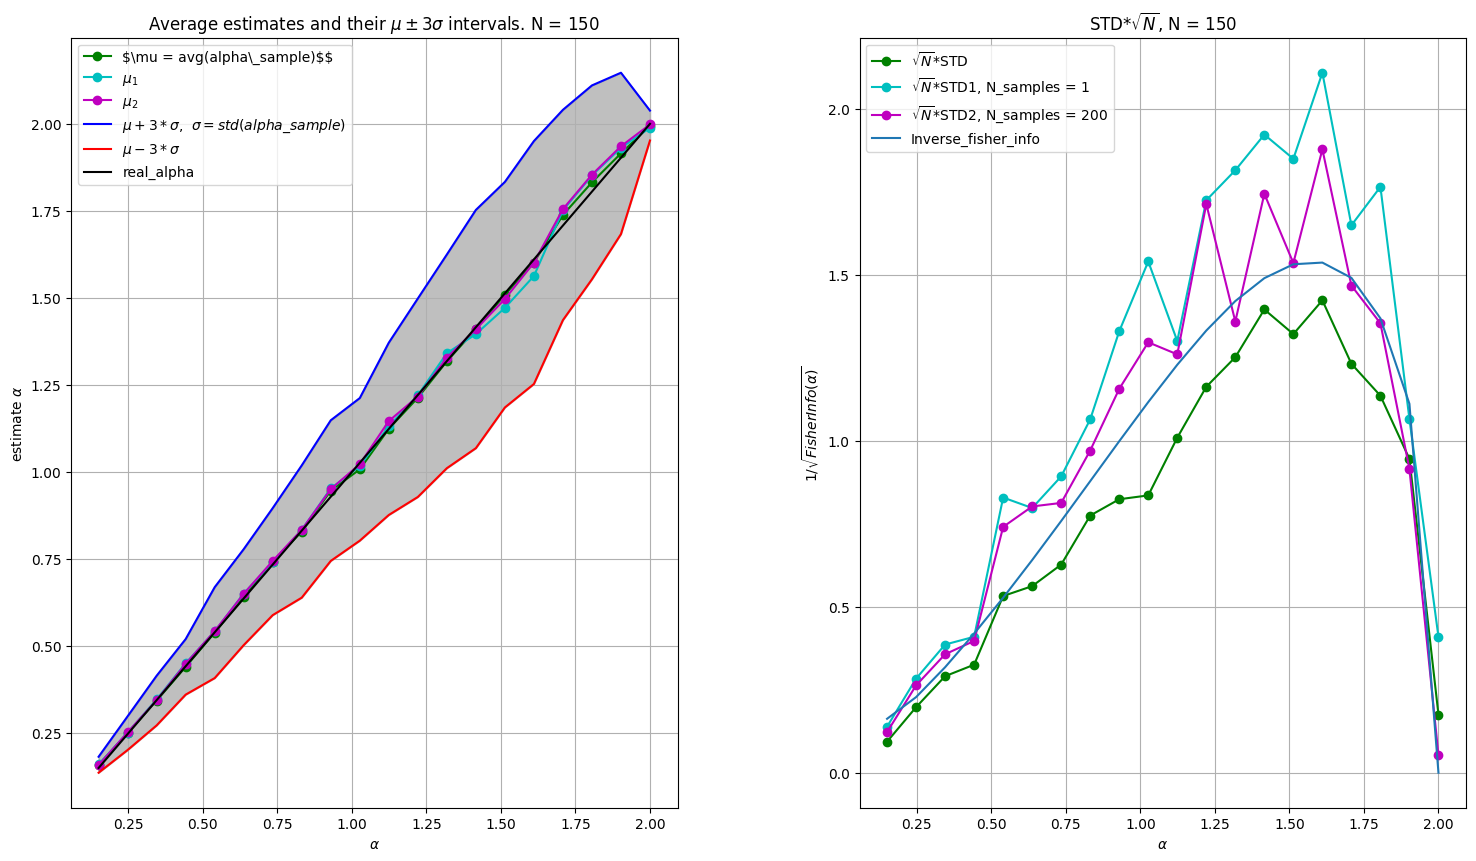

In [ ]:
gran = 20
#The choice of the number of observations
N = 150  # A larger sample size is chosen:
LLL = calculate_estimates_and_visualize2(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 1, 200)

alpha = 0.1500, est0 = 0.1568, std0 = 0.0037
alpha = 0.1500, est1 = 0.1569, std1 = 0.0049
alpha = 0.1500, est2 = 0.1567, std2 = 0.0046
---------------------------------------------------------------
alpha = 0.2474, est0 = 0.2483, std0 = 0.0071
alpha = 0.2474, est1 = 0.2487, std1 = 0.0101
alpha = 0.2474, est2 = 0.2485, std2 = 0.0094
---------------------------------------------------------------
alpha = 0.3447, est0 = 0.3441, std0 = 0.0096
alpha = 0.3447, est1 = 0.3440, std1 = 0.0137
alpha = 0.3447, est2 = 0.3438, std2 = 0.0125
---------------------------------------------------------------
alpha = 0.4421, est0 = 0.4449, std0 = 0.0129
alpha = 0.4421, est1 = 0.4454, std1 = 0.0180
alpha = 0.4421, est2 = 0.4458, std2 = 0.0167
---------------------------------------------------------------
alpha = 0.5395, est0 = 0.5381, std0 = 0.0154
alpha = 0.5395, est1 = 0.5389, std1 = 0.0216
alpha = 0.5395, est2 = 0.5388, std2 = 0.0206
---------------------------------------------------------------
alpha

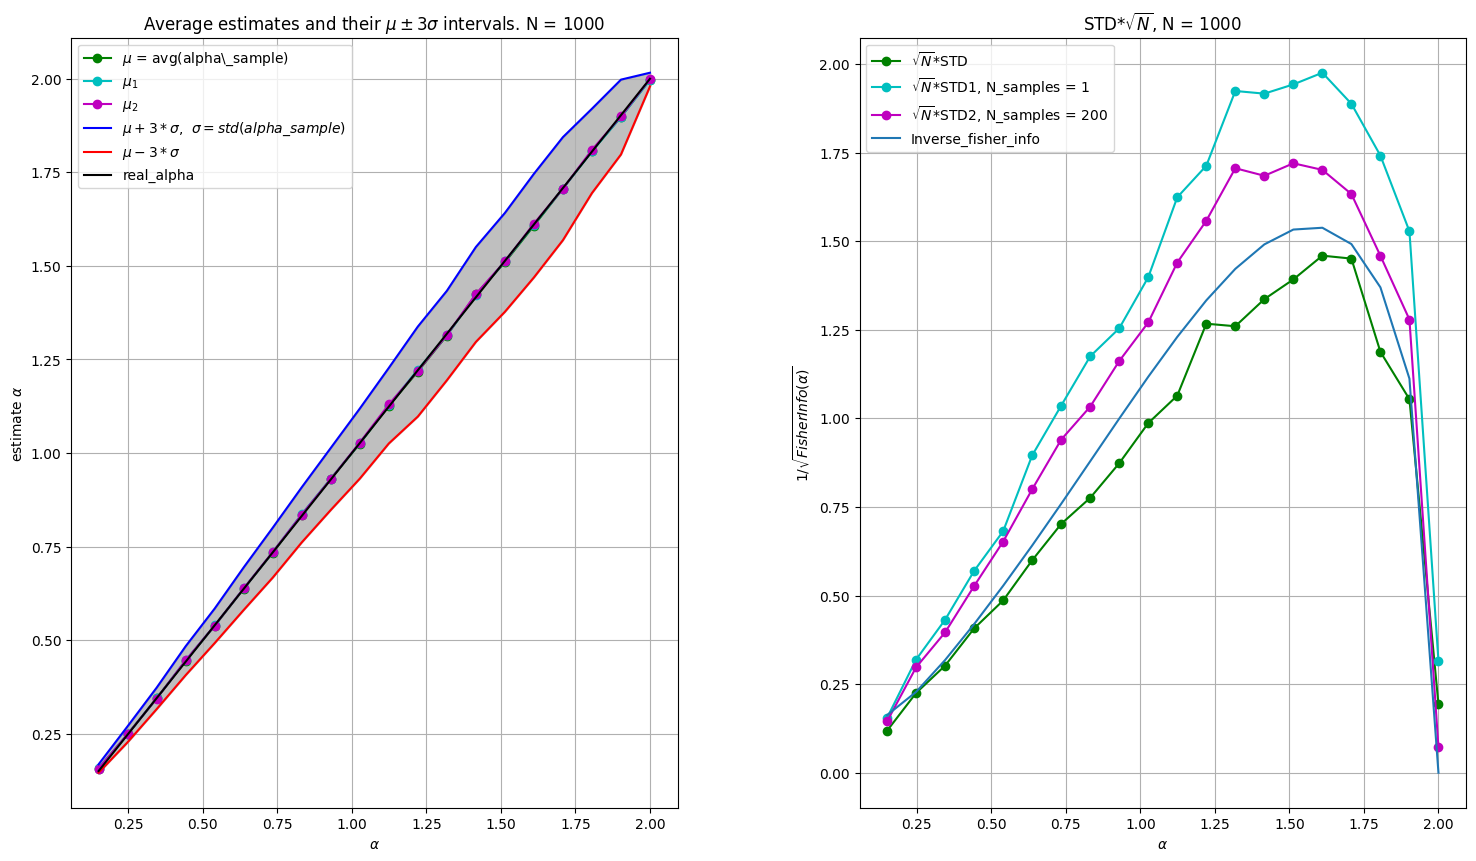

In [ ]:
gran = 20
#The choice of the number of observations
N = 1000  # A larger sample size is chosen:
N_samples = 200
LLL = calculate_estimates_and_visualize2(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 1, 200)

In [ ]:
def calculate_estimates_and_visualize3(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, N_f, verbose, n_samples1, n_samples2):
    # Description of the input variables
    # N                       ... sample size
    # gran                    ... the number of alpha values that are estimated and tested
    # N_samples               ... the number of samples for each value of alpha
    # start_alpha             ... the first (smallest) alpha (but bigger than 0.1)
    # end_alpha               ... the last  (biggest)  alpha (but not larger than 2)
    # portfolio_of_functions  ... the set functions each of which can be used to build T
    # N_f                     ... the index of the function in portfolio_of_function that will be applied
    # verbose                 ... if it is one, it will print intermediary results and visualize the final output

    KEY = list(portfolio_of_functions.keys())
    Means = []
    STDs = []

    Means1 = []
    STDs1 = []

    Means2 = []
    STDs2 = []

    values_of_alpha = np.linspace(start_alpha, end_alpha, gran)
    Fishr_invers = []
    Fishr_invers1 = []
    for xa in values_of_alpha:
        # Forming the array of the estimates of xa
        estimates = []
        estimates1 = []
        estimates2 = []
        for i in range(N_samples):
            fun = KEY[N_f]
            # Generation of a sample from S_{\alpha}(1, 0, 0) with sample size N
            X = stable_sample(xa, N)
            X1 = bootstraps(X, n_samples1)
            X1 = X1/2**(1/xa)

            X2 = bootstraps(X, n_samples2)
            X2 = X2/2**(1/xa)
            # Production of the vector T for functions A(a, T), b(a, T), etc.
               # Production of the initial interval with equidistant points
            T = np.arange(0, 3, 0.05)
            # The application of the function of choice on T
            T = portfolio_of_functions[fun](T)
            # Making sure that at least one element is close to unit in array T
            if max(T) < 0.999:
               T[-1] = 0.999
            FX = F(X, T)
            FX1 = F(X1, T)
            FX2 = F(X2, T)
            fun0 = lambda x: projection(FX, T, x)
            fun01 = lambda x: projection(FX1, T, x)
            fun02 = lambda x: projection(FX2, T, x)
            alpha_est = extended_binary_search(fun0, start_alpha, end_alpha)
            alpha_est1 = extended_binary_search(fun01, start_alpha, end_alpha)
            alpha_est2 = extended_binary_search(fun02, start_alpha, end_alpha)
            # Additing the estimate to the array
            estimates.append(alpha_est)
            estimates1.append(alpha_est1)
            estimates2.append(alpha_est2)
        # if you prefer to see the intermediate results you can choose verbose to be equal to 1.    
        if verbose:
          print('alpha = '+truncate_string(xa)+', est0 = '+truncate_string(np.mean(estimates))+', std0 = '+truncate_string(np.std(estimates)))
          print('alpha = '+truncate_string(xa)+', est1 = '+truncate_string(np.mean(estimates1))+', std1 = '+truncate_string(np.std(estimates1)))
          print('alpha = '+truncate_string(xa)+', est2 = '+truncate_string(np.mean(estimates2))+', std2 = '+truncate_string(np.std(estimates2)))
          print('---------------------------------------------------------------')
        # The forming of the arrays of the means and STDs of the estimates
        Means.append(np.mean(estimates))
        STDs.append(np.std(estimates))
        Fishr_invers.append(np.sqrt(0.5/fisher_info(T, xa)))

        Means1.append(np.mean(estimates1))
        STDs1.append(np.std(estimates1))

        Means2.append(np.mean(estimates2))
        STDs2.append(np.std(estimates2))

        Fishr_invers1.append(np.sqrt(0.5/fisher_info1(T, xa)))

    # The calculation of the average and maximum bias of the estimates
    Bias_avg = np.mean((np.array(Means) - np.array(values_of_alpha))**2)
    Bias_max = max((np.array(Means) - np.array(values_of_alpha))**2)
    # The calculation of the average and maximum std of the estimates
    Std_avg = np.mean(STDs)
    Std_max = max(STDs)
    if N < 200:
      print('---------------------------------------------------------------')
      print('N = '+str(N)+'.   For fun(x) = '+fun+' avg_max_bias = '+truncate_string(Bias_avg)+    ', min_max_bias = '+truncate_string(Bias_max))
      print('N = '+str(N)+'.   For fun(x) = '+fun+' avg_max_std  = '+truncate_string(Std_avg)+', min_max_std  = '+truncate_string(Std_max))
    else:
      print('---------------------------------------------------------------')
      print('N = '+str(N)+'. For fun(x) = '+fun+' avg_max_bias = '+truncate_string(Bias_avg)+    ', min_max_bias = '+truncate_string(Bias_max))
      print('N = '+str(N)+'. For fun(x) = '+fun+' avg_max_std  = '+truncate_string(Std_avg)+', min_max_std  = '+truncate_string(Std_max))
    # The calculation of mu plus/minus 3sigma
    upper_line = np.array(Means) + 3*np.array(STDs)
    lower_line = np.array(Means) - 3*np.array(STDs)
    # Visualization
    if verbose:
        fig, ax = plt.subplots(figsize=(18, 10), ncols=2)

        ax[0].plot(values_of_alpha, Means, 'g-o')
        ax[0].plot(values_of_alpha, Means1, 'c-o')
        ax[0].plot(values_of_alpha, Means2, 'm-o')
        ax[0].plot(values_of_alpha, upper_line, 'b')
        ax[0].plot(values_of_alpha, lower_line, 'r')
        ax[0].plot(values_of_alpha, values_of_alpha, 'k')
        ax[0].fill_between(values_of_alpha, upper_line, lower_line, color='gray', alpha=0.5)
        ax[0].grid()
        ax[0].set_xlabel(r'$\alpha$')
        ax[0].set_ylabel(r'estimate $\alpha$')
        ax[0].set_title(r'Average estimates and their $\mu \pm 3 \sigma$ intervals. N = ' + str(N))
        ax[0].legend(['$\mu = avg(alpha\_sample)$', '$\mu_1$', '$\mu_2$', '$ \mu + 3*\sigma$,  $\sigma = std(alpha\_sample)$', '$\mu - 3*\sigma$',  'real_alpha'])

        # Your original code for the right subplot
        ax[1].plot(values_of_alpha, np.array(STDs)*np.sqrt(N), 'g-o')
        ax[1].plot(values_of_alpha, np.array(STDs1)*np.sqrt(N), 'c-o')
        ax[1].plot(values_of_alpha, np.array(STDs2)*np.sqrt(N), 'm-o')
        #ax[1].plot(values_of_alpha, Fishr_invers)
        ax[1].set_xlabel(r'$\alpha$')
        ax[1].set_ylabel(r'$1/\sqrt{FisherInfo(\alpha)}$')
        ax[1].grid()
        ax[1].legend([r'$\sqrt{N}$*STD', r'$\sqrt{N}$*STD1'+f', N_samples = {n_samples1}', r'$\sqrt{N}$*STD2'+f', N_samples = {n_samples2}'])
        ax[1].set_title(r'STD*$\sqrt{N}$, N = '+str(N))

        # Adjust the spacing between the subplots
        plt.subplots_adjust(wspace=0.3)
    return Means, STDs, Bias_max, Std_max, Means1, STDs1, Means1, STDs1, Means2, STDs2

alpha = 0.1500, est0 = 0.1577, std0 = 0.0074
alpha = 0.1500, est1 = 0.1606, std1 = 0.0107
alpha = 0.1500, est2 = 0.1594, std2 = 0.0092
---------------------------------------------------------------
alpha = 0.2474, est0 = 0.2490, std0 = 0.0148
alpha = 0.2474, est1 = 0.2514, std1 = 0.0212
alpha = 0.2474, est2 = 0.2507, std2 = 0.0198
---------------------------------------------------------------
alpha = 0.3447, est0 = 0.3452, std0 = 0.0220
alpha = 0.3447, est1 = 0.3471, std1 = 0.0326
alpha = 0.3447, est2 = 0.3468, std2 = 0.0294
---------------------------------------------------------------
alpha = 0.4421, est0 = 0.4461, std0 = 0.0264
alpha = 0.4421, est1 = 0.4474, std1 = 0.0365
alpha = 0.4421, est2 = 0.4482, std2 = 0.0344
---------------------------------------------------------------
alpha = 0.5395, est0 = 0.5445, std0 = 0.0341
alpha = 0.5395, est1 = 0.5469, std1 = 0.0487
alpha = 0.5395, est2 = 0.5472, std2 = 0.0468
---------------------------------------------------------------
alpha

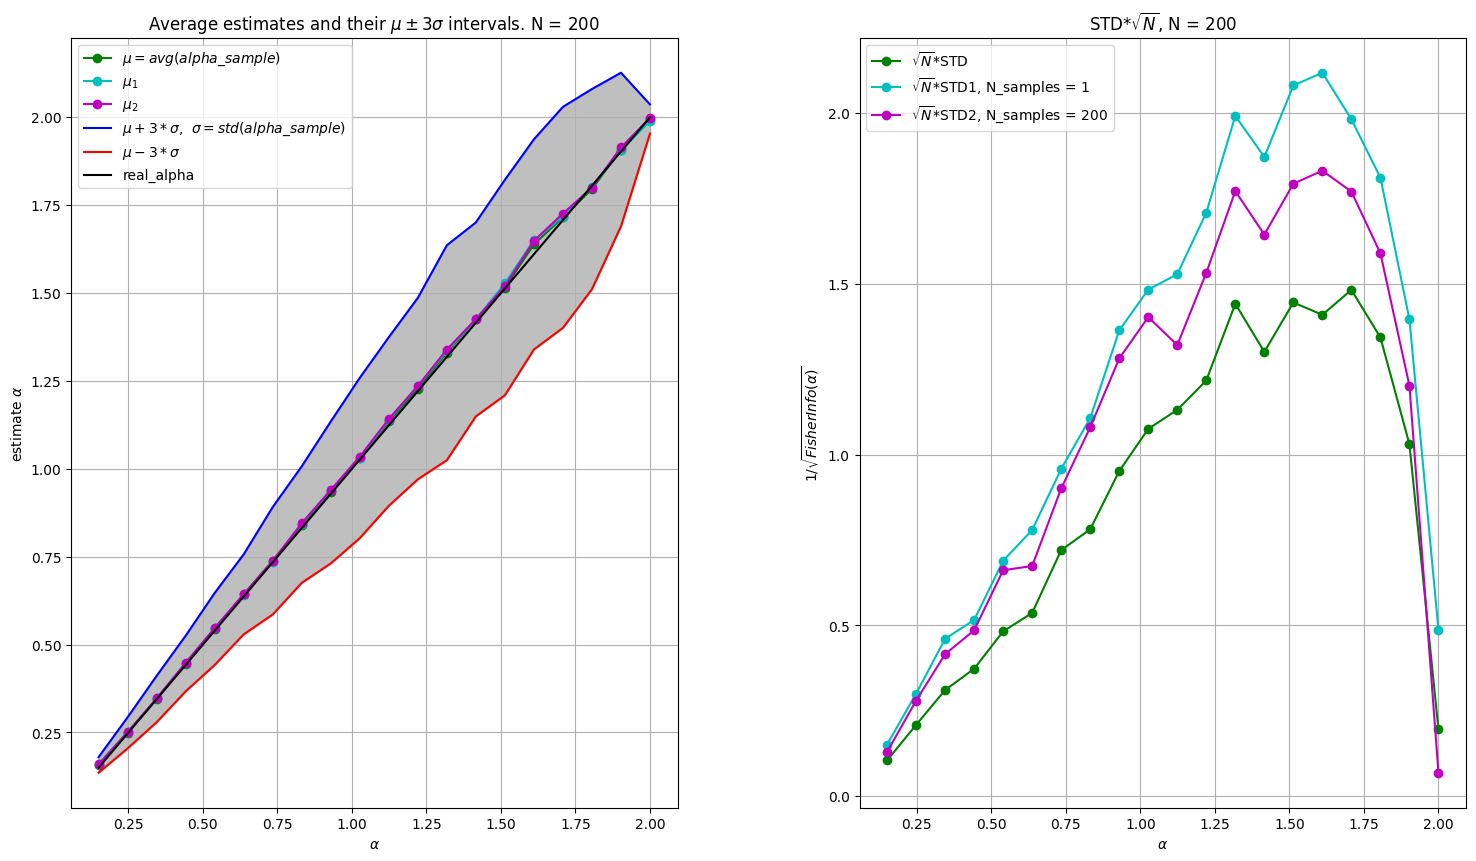

In [ ]:
gran = 20
#The choice of the number of observations
N = 200  # A larger sample size is chosen:
N_samples = 200
LLL = calculate_estimates_and_visualize3(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 1, 200)

In [ ]:
gran = 20
#The choice of the number of observations
N = 500  # A larger sample size is chosen:
N_samples = 200
LLL = calculate_estimates_and_visualize3(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 1, 500)

alpha = 0.1500, est0 = 0.1567, std0 = 0.0046
alpha = 0.1500, est1 = 0.1573, std1 = 0.0066
alpha = 0.1500, est2 = 0.1570, std2 = 0.0058
---------------------------------------------------------------
alpha = 0.2474, est0 = 0.2471, std0 = 0.0089
alpha = 0.2474, est1 = 0.2476, std1 = 0.0128
alpha = 0.2474, est2 = 0.2474, std2 = 0.0116
---------------------------------------------------------------
alpha = 0.3447, est0 = 0.3449, std0 = 0.0120
alpha = 0.3447, est1 = 0.3443, std1 = 0.0167
alpha = 0.3447, est2 = 0.3450, std2 = 0.0159
---------------------------------------------------------------
alpha = 0.4421, est0 = 0.4395, std0 = 0.0159
alpha = 0.4421, est1 = 0.4404, std1 = 0.0227
alpha = 0.4421, est2 = 0.4399, std2 = 0.0200
---------------------------------------------------------------
alpha = 0.5395, est0 = 0.5411, std0 = 0.0206
alpha = 0.5395, est1 = 0.5430, std1 = 0.0269
alpha = 0.5395, est2 = 0.5430, std2 = 0.0248
---------------------------------------------------------------
alpha

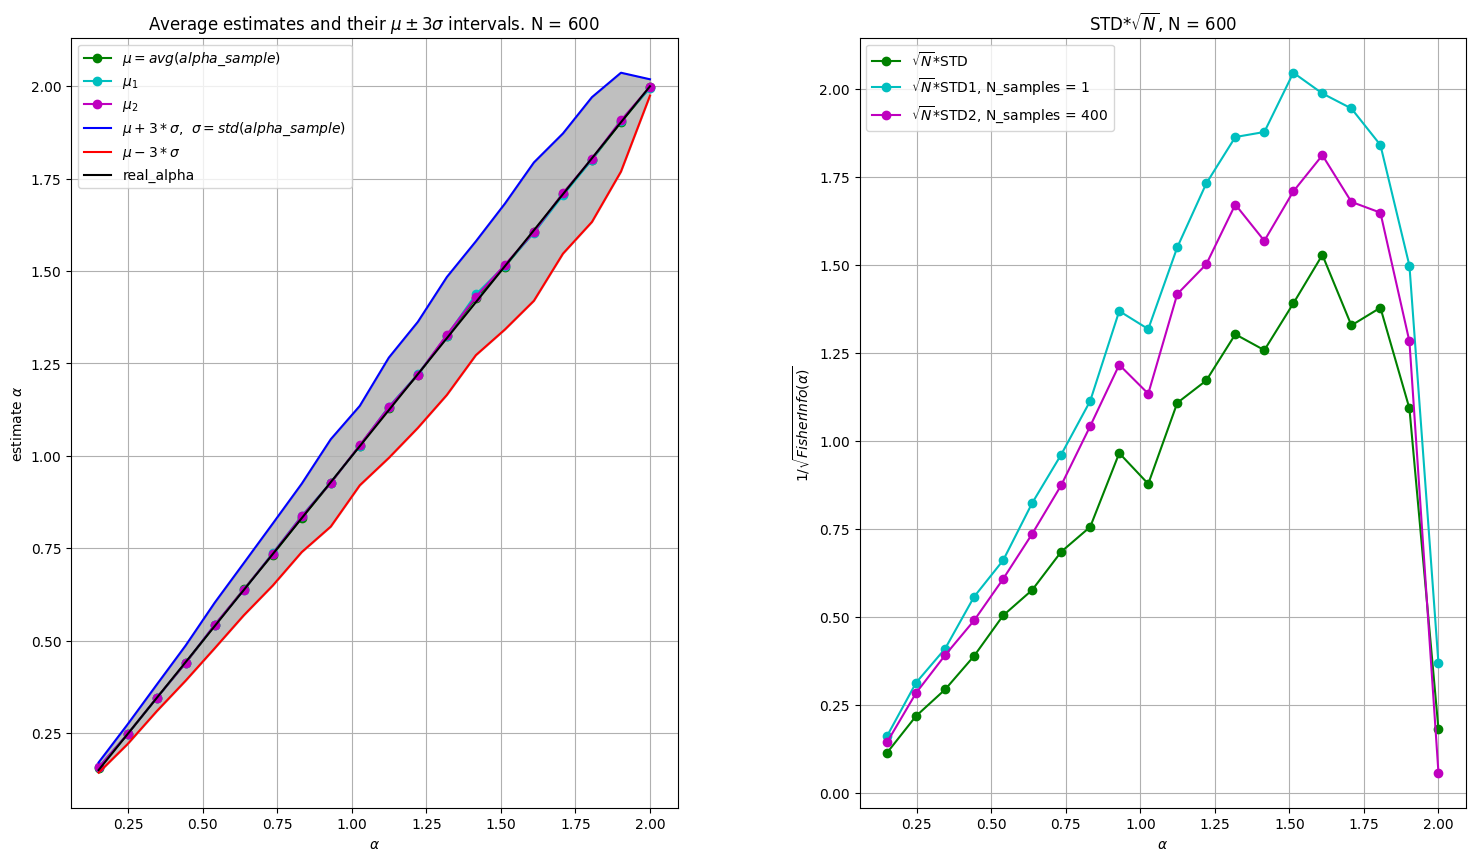

In [ ]:
gran = 20
#The choice of the number of observations
N = 600  # A larger sample size is chosen:
N_samples = 200
LLL = calculate_estimates_and_visualize3(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 1, 400)

alpha = 0.1500, est0 = 0.1577, std0 = 0.0074
alpha = 0.1500, est1 = 0.1606, std1 = 0.0106
alpha = 0.1500, est2 = 0.1597, std2 = 0.0095
---------------------------------------------------------------
alpha = 0.2474, est0 = 0.2493, std0 = 0.0150
alpha = 0.2474, est1 = 0.2498, std1 = 0.0212
alpha = 0.2474, est2 = 0.2499, std2 = 0.0191
---------------------------------------------------------------
alpha = 0.3447, est0 = 0.3452, std0 = 0.0221
alpha = 0.3447, est1 = 0.3480, std1 = 0.0325
alpha = 0.3447, est2 = 0.3468, std2 = 0.0286
---------------------------------------------------------------
alpha = 0.4421, est0 = 0.4438, std0 = 0.0251
alpha = 0.4421, est1 = 0.4473, std1 = 0.0363
alpha = 0.4421, est2 = 0.4459, std2 = 0.0323
---------------------------------------------------------------
alpha = 0.5395, est0 = 0.5407, std0 = 0.0363
alpha = 0.5395, est1 = 0.5450, std1 = 0.0512
alpha = 0.5395, est2 = 0.5450, std2 = 0.0477
---------------------------------------------------------------
alpha

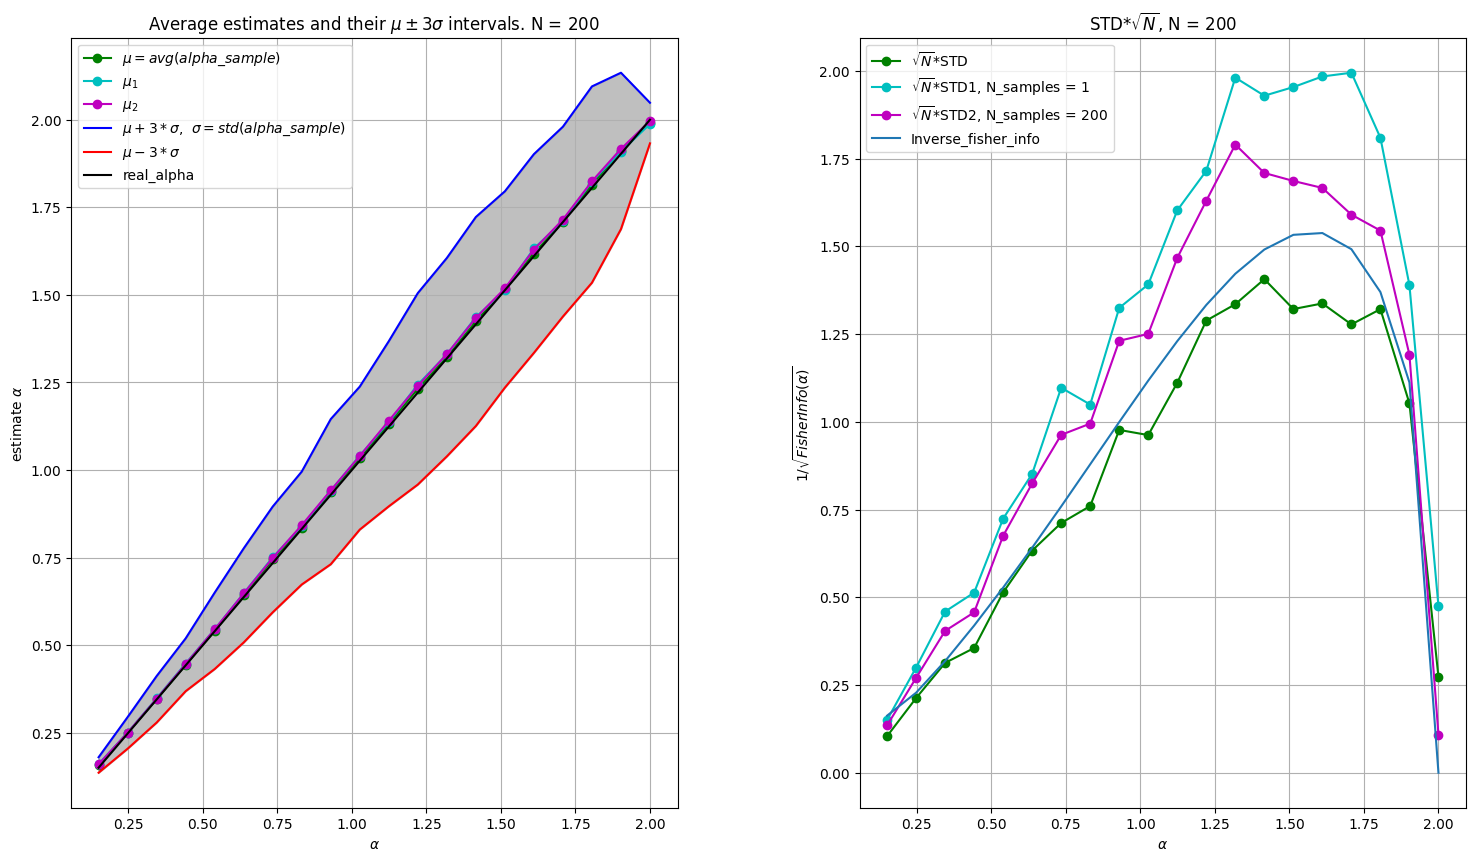

In [ ]:
gran = 20
#The choice of the number of observations
N = 200  # A larger sample size is chosen:
N_samples = 200
LLL = calculate_estimates_and_visualize2(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 1, 200)

In [ ]:
gran = 20
#The choice of the number of observations
N = 150  # A larger sample size is chosen:
LLL = calculate_estimates_and_visualize2(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 200, 500)

alpha = 0.1500, est0 = 0.1582, std0 = 0.0077
alpha = 0.1500, est1 = 0.1594, std1 = 0.0099
alpha = 0.1500, est2 = 0.1593, std2 = 0.0098
---------------------------------------------------------------
alpha = 0.2474, est0 = 0.2486, std0 = 0.0189
alpha = 0.2474, est1 = 0.2507, std1 = 0.0230
alpha = 0.2474, est2 = 0.2506, std2 = 0.0228
---------------------------------------------------------------
alpha = 0.3447, est0 = 0.3439, std0 = 0.0227
alpha = 0.3447, est1 = 0.3467, std1 = 0.0307
alpha = 0.3447, est2 = 0.3467, std2 = 0.0308
---------------------------------------------------------------


KeyboardInterrupt: ignored

alpha = 0.1500, est0 = 0.1563, std0 = 0.0074
alpha = 0.1500, est1 = 0.1590, std1 = 0.0111
alpha = 0.1500, est2 = 0.1579, std2 = 0.0111
---------------------------------------------------------------
alpha = 0.2474, est0 = 0.2482, std0 = 0.0180
alpha = 0.2474, est1 = 0.2518, std1 = 0.0258
alpha = 0.2474, est2 = 0.2509, std2 = 0.0229
---------------------------------------------------------------
alpha = 0.3447, est0 = 0.3486, std0 = 0.0265
alpha = 0.3447, est1 = 0.3517, std1 = 0.0418
alpha = 0.3447, est2 = 0.3472, std2 = 0.0379
---------------------------------------------------------------
alpha = 0.4421, est0 = 0.4519, std0 = 0.0349
alpha = 0.4421, est1 = 0.4424, std1 = 0.0471
alpha = 0.4421, est2 = 0.4453, std2 = 0.0428
---------------------------------------------------------------
alpha = 0.5395, est0 = 0.5445, std0 = 0.0459
alpha = 0.5395, est1 = 0.5408, std1 = 0.0621
alpha = 0.5395, est2 = 0.5439, std2 = 0.0604
---------------------------------------------------------------
alpha

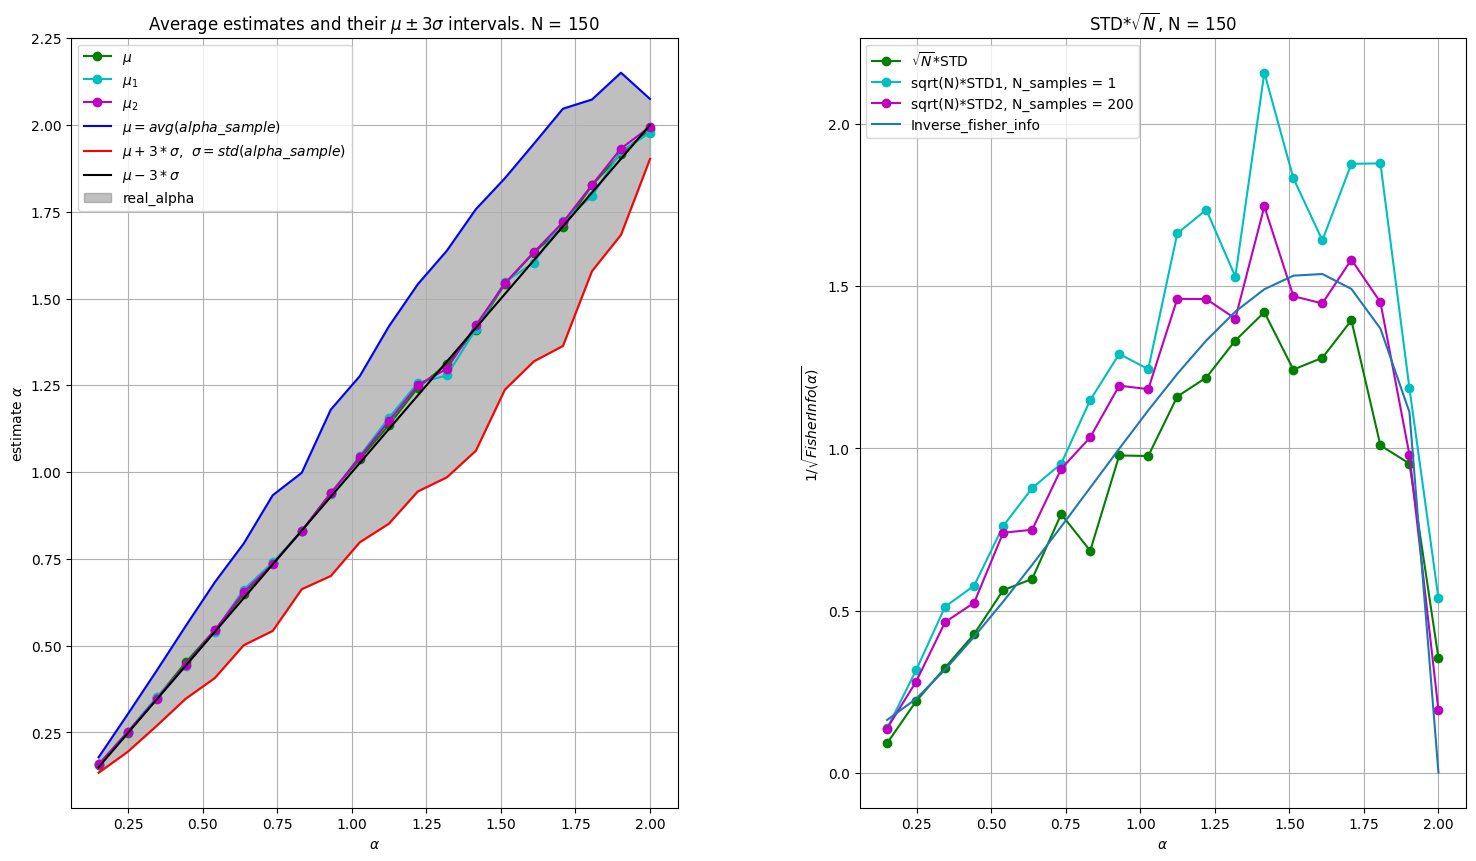

In [ ]:
#The choice of the number of observations
N = 150  # A larger sample size is chosen:
LLL = calculate_estimates_and_visualize2(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 1, 200)

alpha = 0.1500, est0 = 0.1571, std0 = 0.0077
alpha = 0.1500, est1 = 0.1583, std1 = 0.0101
alpha = 0.1500, est2 = 0.1572, std2 = 0.0107
---------------------------------------------------------------
alpha = 0.3556, est0 = 0.3548, std0 = 0.0232
alpha = 0.3556, est1 = 0.3571, std1 = 0.0383
alpha = 0.3556, est2 = 0.3558, std2 = 0.0315
---------------------------------------------------------------
alpha = 0.5611, est0 = 0.5688, std0 = 0.0499
alpha = 0.5611, est1 = 0.5732, std1 = 0.0665
alpha = 0.5611, est2 = 0.5705, std2 = 0.0615
---------------------------------------------------------------
alpha = 0.7667, est0 = 0.7872, std0 = 0.0544
alpha = 0.7667, est1 = 0.7921, std1 = 0.0731
alpha = 0.7667, est2 = 0.7966, std2 = 0.0717
---------------------------------------------------------------
alpha = 0.9722, est0 = 0.9722, std0 = 0.0913
alpha = 0.9722, est1 = 0.9641, std1 = 0.1270
alpha = 0.9722, est2 = 0.9733, std2 = 0.1161
---------------------------------------------------------------
alpha

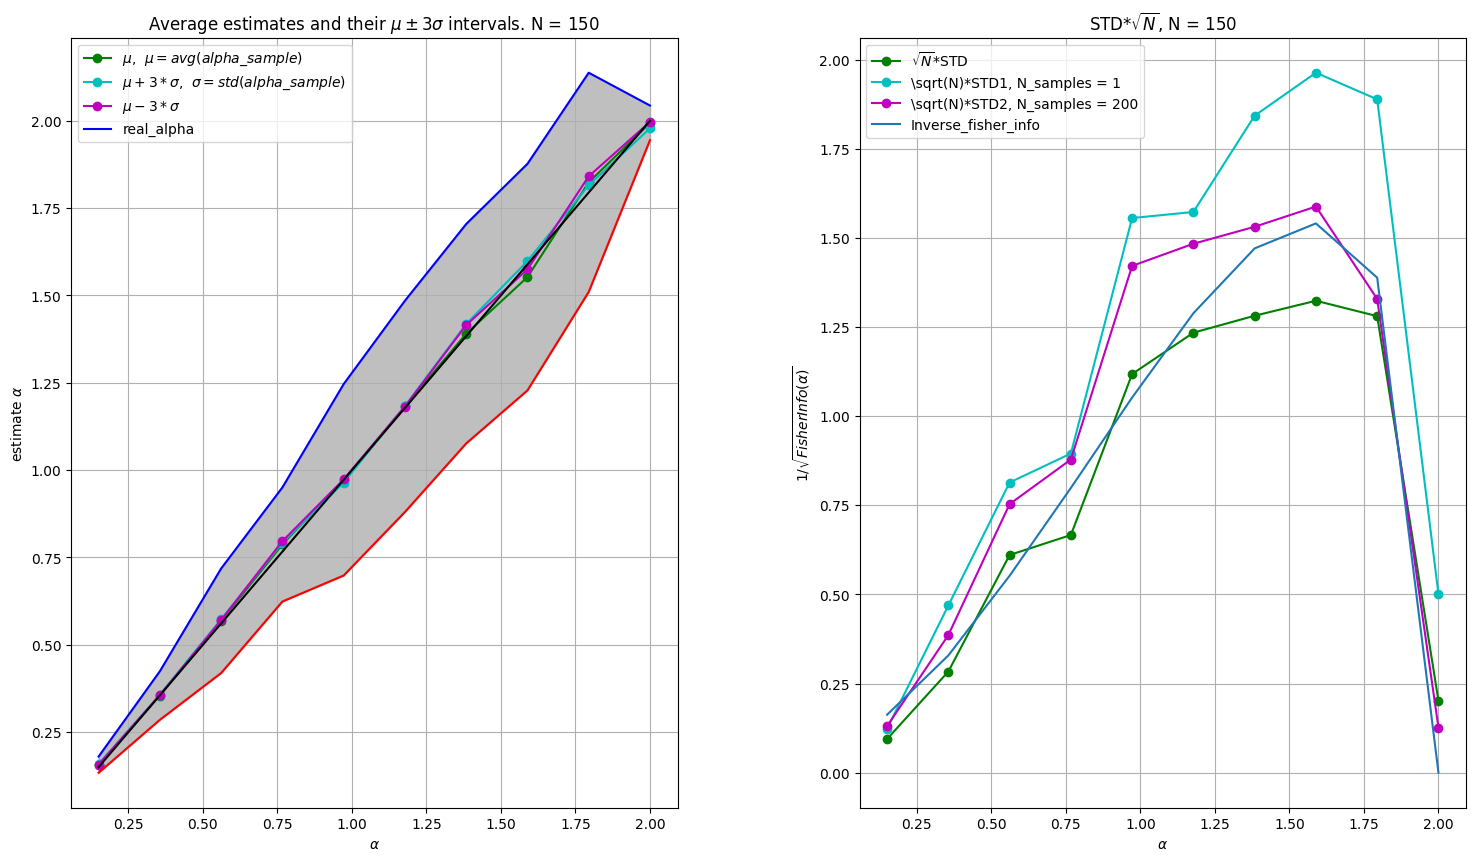

In [ ]:
#The choice of the number of observations
N = 150  # A larger sample size is chosen:
LLL = calculate_estimates_and_visualize2(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1, 1, 200)

In [ ]:
stds_100 = LLL[1]

alpha = 0.1500, est = 0.1562, std = 0.0009
alpha = 0.3556, est = 0.3562, std = 0.0027
alpha = 0.5611, est = 0.5610, std = 0.0044
alpha = 0.7667, est = 0.7665, std = 0.0055
alpha = 0.9722, est = 0.9729, std = 0.0065
alpha = 1.1778, est = 1.1794, std = 0.0120
alpha = 1.3833, est = 1.3831, std = 0.0104
alpha = 1.5889, est = 1.5881, std = 0.0106
alpha = 1.7944, est = 1.7936, std = 0.0118
alpha = 2.0000, est = 1.9997, std = 0.0003
---------------------------------------------------------------
N = 15000. For fun(x) = min(x^3,x^5)  avg_max_bias = 0.0000, min_max_bias = 0.0000
N = 15000. For fun(x) = min(x^3,x^5)  avg_max_std  = 0.0065, min_max_std  = 0.0120


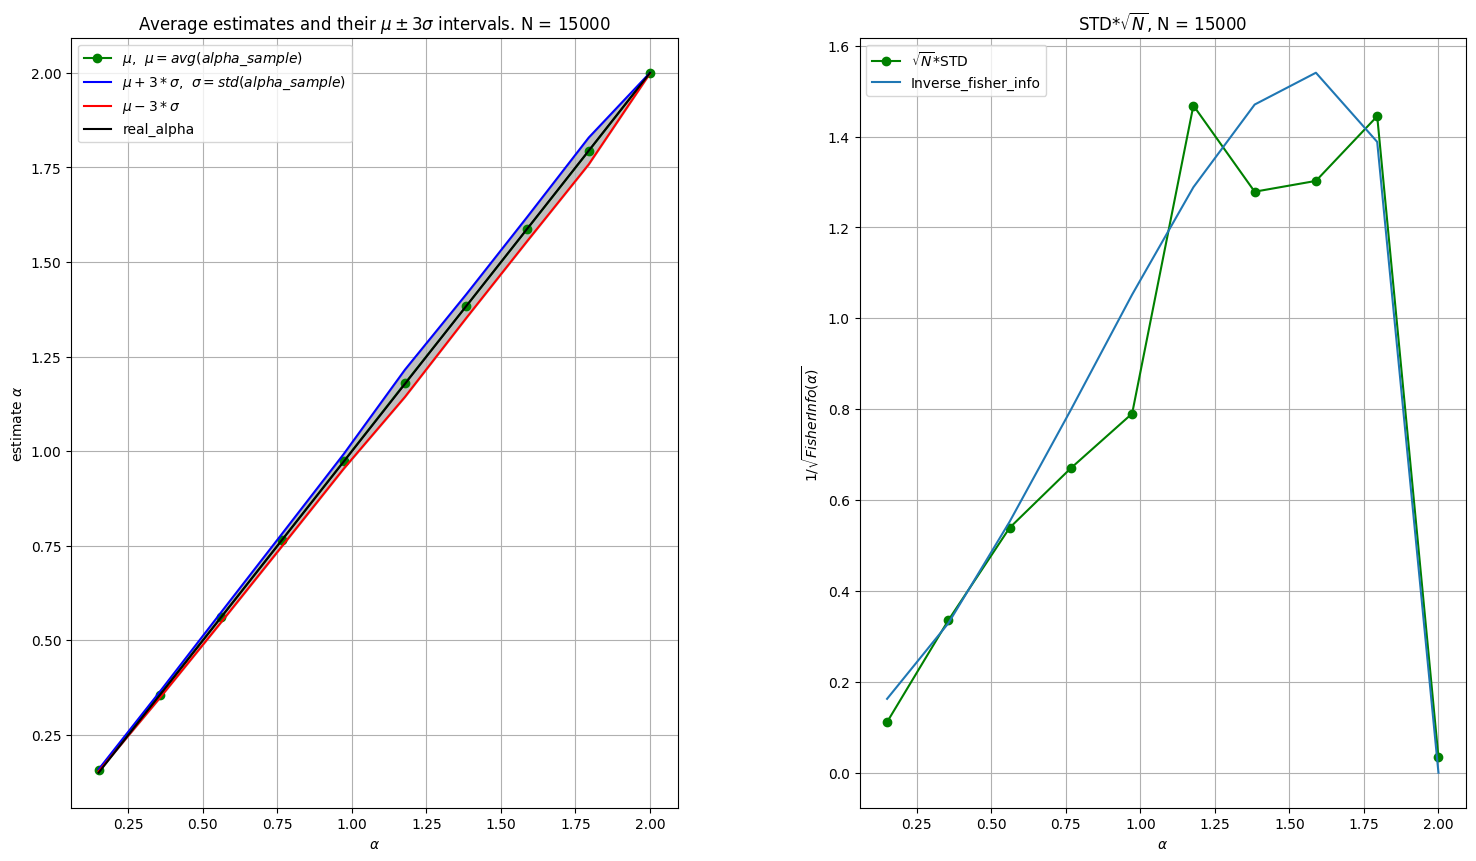

In [ ]:
# The choice of the number of observations
N = 15000  # A larger sample size is chosen:
LLL = calculate_estimates_and_visualize(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1)

In [ ]:
stds_15000 = LLL[1]

alpha = 0.1500, est = 0.1562, std = 0.0001
alpha = 0.3556, est = 0.3556, std = 0.0003
alpha = 0.5611, est = 0.5611, std = 0.0004
alpha = 0.7667, est = 0.7667, std = 0.0007
alpha = 0.9722, est = 0.9721, std = 0.0009
alpha = 1.1778, est = 1.1778, std = 0.0010
alpha = 1.3833, est = 1.3830, std = 0.0016
alpha = 1.5889, est = 1.5887, std = 0.0015
alpha = 1.7944, est = 1.7946, std = 0.0014
alpha = 2.0000, est = 2.0000, std = 0.0000
---------------------------------------------------------------
N = 1000000. For fun(x) = min(x^3,x^5)  avg_max_bias = 0.0000, min_max_bias = 0.0000
N = 1000000. For fun(x) = min(x^3,x^5)  avg_max_std  = 0.0008, min_max_std  = 0.0016


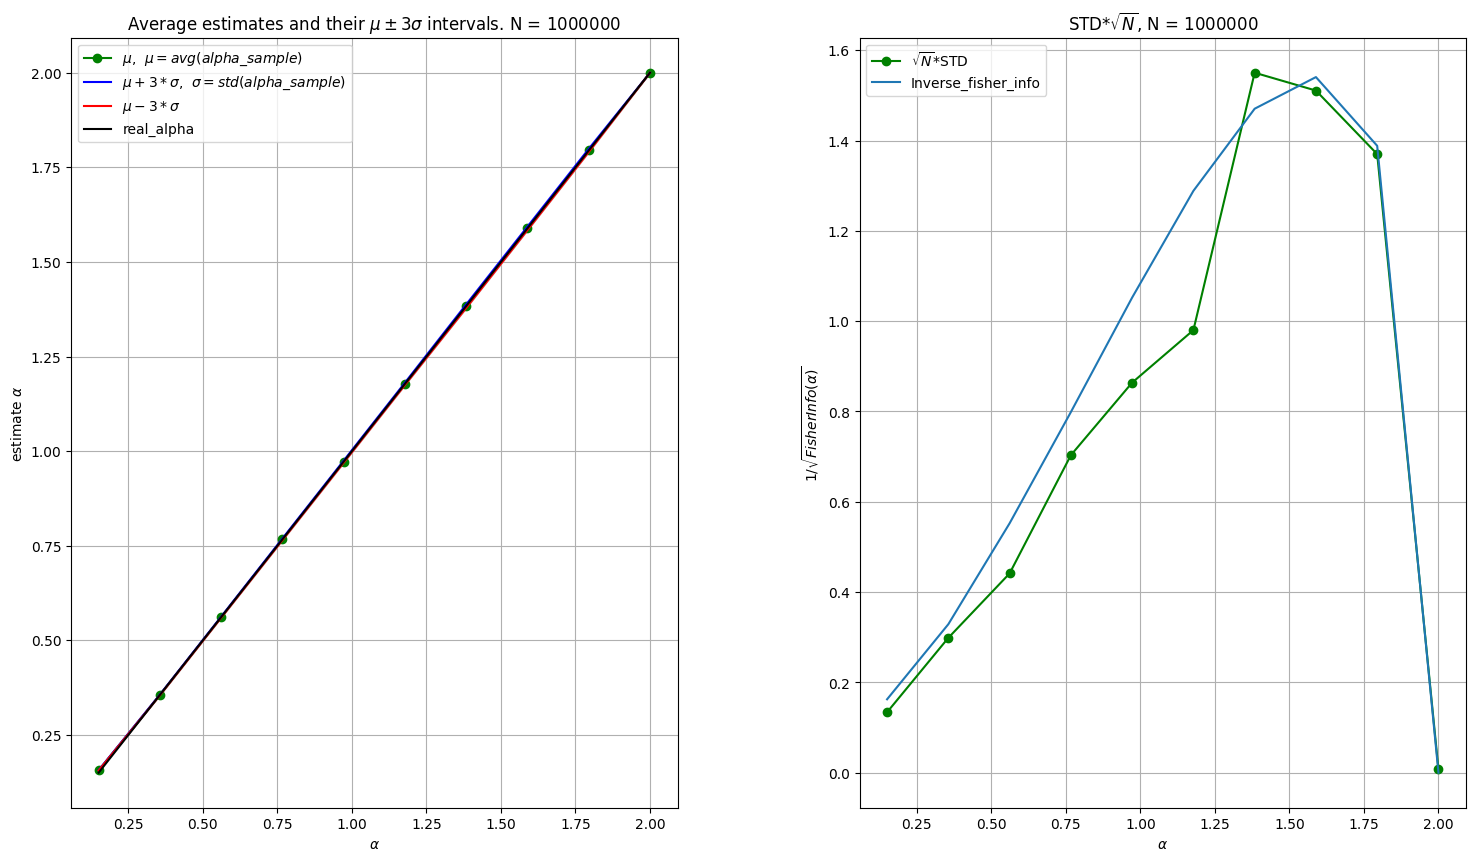

In [ ]:
# The choice of the number of observations
N = 1000000  # A sample size of the million is chosen:
LLL = calculate_estimates_and_visualize(N, gran, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1)

In [ ]:
stds_million = LLL[1]

alpha = 0.1500, est = 0.1562, std = 0.0001
alpha = 0.2474, est = 0.2479, std = 0.0001
alpha = 0.3447, est = 0.3448, std = 0.0002
alpha = 0.4421, est = 0.4421, std = 0.0002
alpha = 0.5395, est = 0.5394, std = 0.0002
alpha = 0.6368, est = 0.6368, std = 0.0003
alpha = 0.7342, est = 0.7342, std = 0.0003
alpha = 0.8316, est = 0.8316, std = 0.0004
alpha = 0.9289, est = 0.9291, std = 0.0004
alpha = 1.0263, est = 1.0263, std = 0.0004
alpha = 1.1237, est = 1.1237, std = 0.0005
alpha = 1.2211, est = 1.2211, std = 0.0005
alpha = 1.3184, est = 1.3183, std = 0.0005
alpha = 1.4158, est = 1.4158, std = 0.0006
alpha = 1.5132, est = 1.5132, std = 0.0006
alpha = 1.6105, est = 1.6105, std = 0.0006
alpha = 1.7079, est = 1.7079, std = 0.0007
alpha = 1.8053, est = 1.8053, std = 0.0006
alpha = 1.9026, est = 1.9026, std = 0.0004
alpha = 2.0000, est = 1.9998, std = 0.0000
---------------------------------------------------------------
N = 5000000. For fun(x) = min(x^3,x^5)  avg_max_bias = 0.0000, min_max_bias 

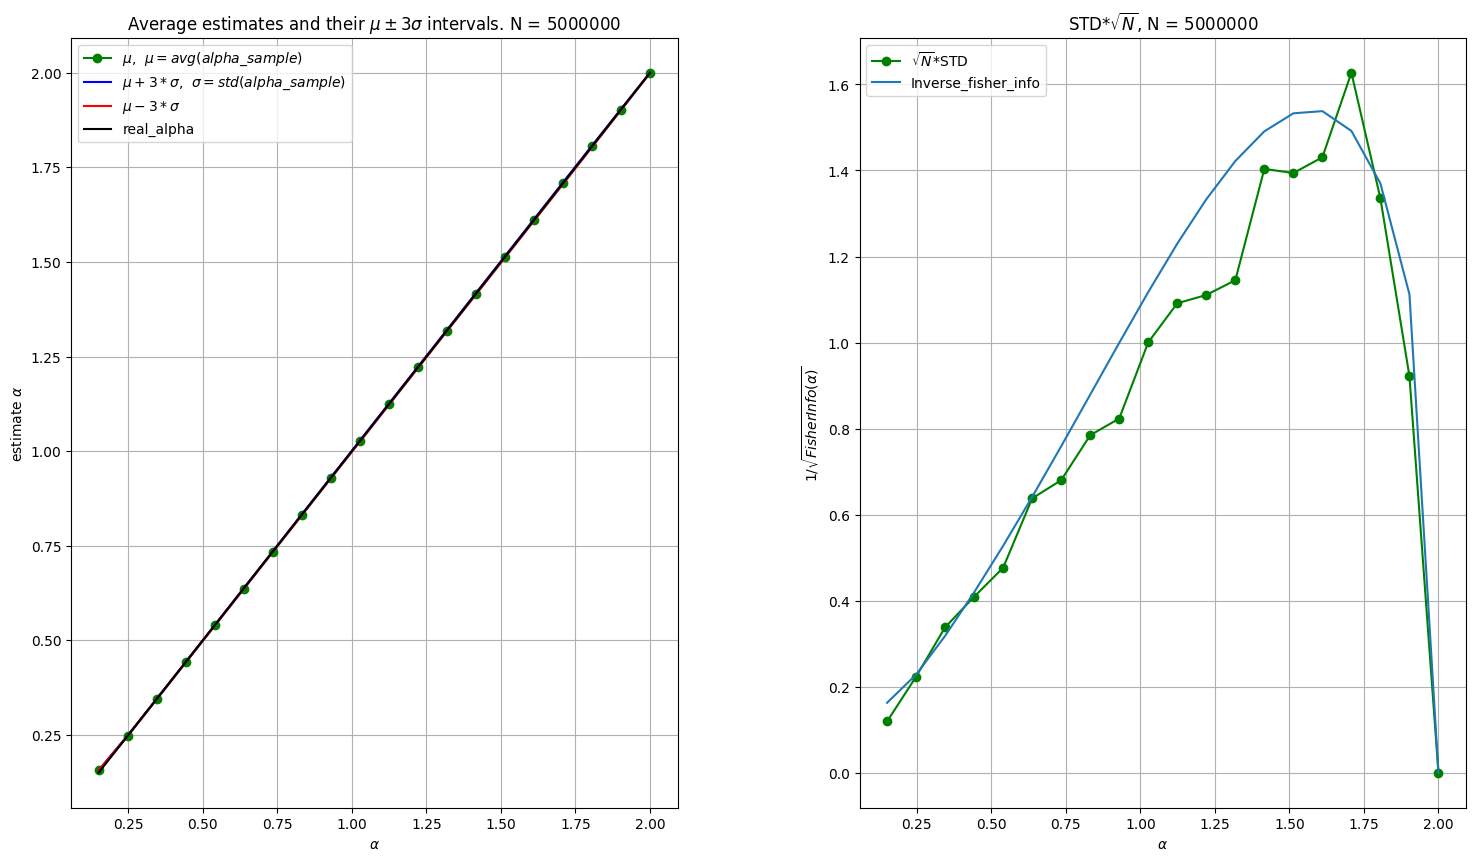

In [ ]:
# The choice of the number of observations
N = 5000000  # A sample size of the million is chosen:
LLL = calculate_estimates_and_visualize(N, 20, N_samples, start_alpha, end_alpha, portfolio_of_functions, 8, 1)

# **Conclusion**

In this script, we provided the description of the method of projections (MLP), and demonstrated it on stable distributions. We demonstrated the consistency of the estimates and visualized how the estimation procedure is conducted. 

We showed the interdependence between the MLP estimator, the Error function, and the Fisher information. 

Further applications of this method can be found in the following scripts:

[Estimation of $\alpha$ of symmetric geometric stable distributions $GS_{\alpha}(1,0,0)$](https://colab.research.google.com/drive/1D7a7Y7qUhlmBxEJ_ChrJM0W4BjD6yA9I)

[MLP applied on the estimation of parameter of nine families of distributions including NIG, Gumbel, Stable, Gamma, etc](https://colab.research.google.com/drive/1w-l2tJtChO89jmwn2q-ywV0ZAXiKDZrI)

[Estimation of $\alpha$ and $\mathbf{R}$ of subgaussian distributions](https://colab.research.google.com/drive/1Ird6vb44iCw2GWlsld4ixO40DSJb5Ok6##scrollTo=N35CAemCTDfh)

[The demonstration of the empirical MLP](https://colab.research.google.com/drive/1YA9YHCj3KxeIKwcbzmY6UN2vGzCJ1tsL##scrollTo=cwGDGKknYA-w)

[Estimation of $\alpha$ of $S_{\alpha}(1,0,0)$ by means of the generic and empirical MLP](https://colab.research.google.com/drive/1pms6g6LLFW3Q1AtbE0xomTuhdEAcCPbR##scrollTo=N3uu9Klk-0zP)

[Estimation of parameters of three distributions using stored projection vectors](https://colab.research.google.com/drive/1bo58_UhBq9dUPSm1ff3SBBjoB4QWxfO3##scrollTo=WuY-zsYb7j8Y)